In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyedfread import edf
import pickle
from glob import glob
from os.path import join
%matplotlib inline
import seaborn as sns
from scipy import signal
from scipy import interpolate
#from PSPupil import pupil_preprocess as psp
#from PSPupil import PupilPreprocess as PS
from PSPupil import Preprocessing as PS
from scipy.stats import ttest_ind


In [2]:
control_color='teal'
baseline_color='goldenrod'

## A) code in longform

In [12]:
subject = '020'
session = 'Baseline'
run='000'
directory='/Volumes/psp_data/Lisa_Marc/'

In [16]:
p = PS.execute(subject, 'patient', session, run, out_dir = '/Users/kenohagena/PSP/test')

File Error for 020 Baseline 000


In [15]:
d = PS.adjust(subject, 'patient', session, run, out_dir = '/Users/kenohagena/PSP/test', islands=10, excel_thresh=2)

IndexError: list index out of range

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/tables/tests/common.py:25: UserWarning: Module pyedfread was already imported from /Users/kenohagena/anaconda3/lib/python3.6/site-packages/pyedfread/__init__.py, but /Users/kenohagena/Documents/Forschung/PSP is being added to sys.path
  from pkg_resources import resource_filename


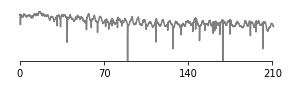

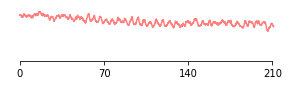

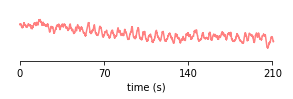

In [17]:
d = pd.read_hdf('/Volumes/psp_data/Preprocessed_combined_data/patient/Pupil_Preprocessed_SUB-025_Baseline_000.hdf')


f, ax = plt.subplots(figsize=(5, 1))
ax.plot(d.diameter_mean.values, color='black', alpha=.5)
ax.set(yticks=[],
       ylim=[0,120],
       xticks=[0, 4000, 8000, 12000],
       xticklabels=[0, 70, 140, 210])
sns.despine(left=True, trim=True)

f.savefig('Example_Preprocessing_1.png', dpi=600)

f, ax = plt.subplots(figsize=(5, 1))
ax.plot(d.d_intp.values, color='red', alpha=.5)
ax.set(yticks=[],
              ylim=[0,120],
       xticks=[0, 4000, 8000, 12000],
       xticklabels=[0, 70, 140, 210])
sns.despine(left=True, trim=True)

f.savefig('Example_Preprocessing_2.png', dpi=600)

f, ax = plt.subplots(figsize=(5, 1))
ax.plot(d.diameter_mean.values, color='white', alpha=.5)

ax.plot(d.biz.values, color='red', alpha=.5)
ax.set(ylim=[-5,5],
       yticks=[],
       xticks=[0, 4000, 8000, 12000],
       xticklabels=[0, 70, 140, 210],
      xlabel='time (s)')
sns.despine(left=True, trim=True)

f.savefig('Example_Preprocessing_3.png', dpi=600)

In [18]:
d

diameter_left  confidence_left  diameter_right  \
time                                                                      
1970-01-01 00:00:05.015     100.688648              1.0       92.795947   
1970-01-01 00:00:05.032     100.836175              1.0       93.322314   
1970-01-01 00:00:05.049     101.034000              1.0       93.130342   
1970-01-01 00:00:05.066     101.122506              1.0       93.066942   
1970-01-01 00:00:05.083     101.194568              1.0       93.230509   
...                                ...              ...             ...   
1970-01-01 00:03:29.916      75.370792              1.0       66.870361   
1970-01-01 00:03:29.933      75.481479              1.0       66.975227   
1970-01-01 00:03:29.950      75.483865              1.0       66.954400   
1970-01-01 00:03:29.967      75.645852              1.0       67.019446   
1970-01-01 00:03:29.984      75.714460              1.0       67.289206   

                         confidence_right  confidence_gaze         x  \
time                                                                   
1970-01-01 00:00:05.015          1.000000         1.000000  0.474488   
1970-01-01 00:00:05.032          0.992335         0.994252  0.474097   
1970-01-01 00:00:05.049          0.999098         0.999462  0.474826   
1970-01-01 00:00:05.066          0.995048         0.997724  0.474602   
1970-01-01 00:00:05.083          0.999937         1.000000  0.474779   
...                                   ...              ...       ...   
1970-01-01 00:03:29.916          1.000000         1.000000  0.488335   
1970-01-01 00:03:29.933          1.000000         1.000000  0.488387   
1970-01-01 00:03:29.950          1.000000         1.000000  0.488679   
1970-01-01 00:03:29.967          1.000000         1.000000  0.488541   
1970-01-01 00:03:29.984          1.000000         1.000000  0.488381   

                                y  distance  velocity  acceleration  notes  \
time                                                                         
1970-01-01 00:00:05.015  0.516212  0.000000  0.000807      0.000392    NaN   
1970-01-01 00:00:05.032  0.516918  0.000807  0.000807      0.000615    NaN   
1970-01-01 00:00:05.049  0.517602  0.000999  0.000192      0.000615    NaN   
1970-01-01 00:00:05.066  0.516716  0.000914  0.000155      0.000431    NaN   
1970-01-01 00:00:05.083  0.517770  0.001069  0.000585      0.000431    NaN   
...                           ...       ...       ...           ...    ...   
1970-01-01 00:03:29.916  0.534394  0.000801  0.000439      0.000211    NaN   
1970-01-01 00:03:29.933  0.535335  0.000942  0.000650      0.000211    NaN   
1970-01-01 00:03:29.950  0.535327  0.000292  0.000650      0.000235    NaN   
1970-01-01 00:03:29.967  0.535896  0.000586  0.000415      0.000235    NaN   
1970-01-01 00:03:29.984  0.535838  0.000170  0.000415      0.000392    NaN   

                         diameter_mean  confidence_d  diameter_blink  margin  \
time                                                                           
1970-01-01 00:00:05.015     100.688648           1.0      100.688648    True   
1970-01-01 00:00:05.032     100.836175           1.0      100.836175    True   
1970-01-01 00:00:05.049     101.034000           1.0      101.034000    True   
1970-01-01 00:00:05.066     101.122506           1.0      101.122506    True   
1970-01-01 00:00:05.083     101.194568           1.0      101.194568    True   
...                                ...           ...             ...     ...   
1970-01-01 00:03:29.916      75.370792           1.0       75.370792    True   
1970-01-01 00:03:29.933      75.481479           1.0       75.481479    True   
1970-01-01 00:03:29.950      75.483865           1.0       75.483865    True   
1970-01-01 00:03:29.967      75.645852           1.0       75.645852    True   
1970-01-01 00:03:29.984      75.714460           1.0       75.714460    True   

                         islands      d_intp       biz  

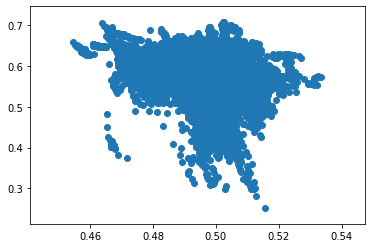

In [38]:
plt.scatter(d.gp.x, d.gp.y)

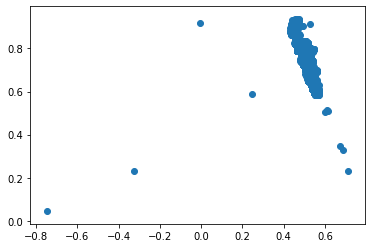

In [41]:
plt.scatter(d.gp.x, d.gp.y)

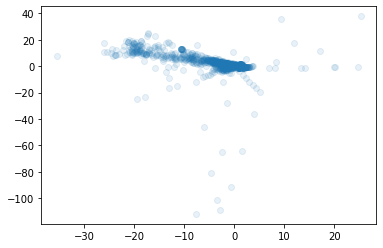

In [49]:
plt.scatter(d.gp.x, d.gp.y, alpha=.1)

In [28]:
d.gp.columns

Index(['diameter_left', 'confidence_left', 'timestamp', 'id', 'time',
       'diameter_right', 'confidence_right', 'timestamp', 'id', 'time',
       'confidence_gaze', 'timestamp', 'x', 'y', 'time', 'distance',
       'velocity', 'acceleration', 'notes', 'diameter_mean', 'confidence_d',
       'diameter_blink', 'margin', 'islands', 'd_intp'],
      dtype='object')

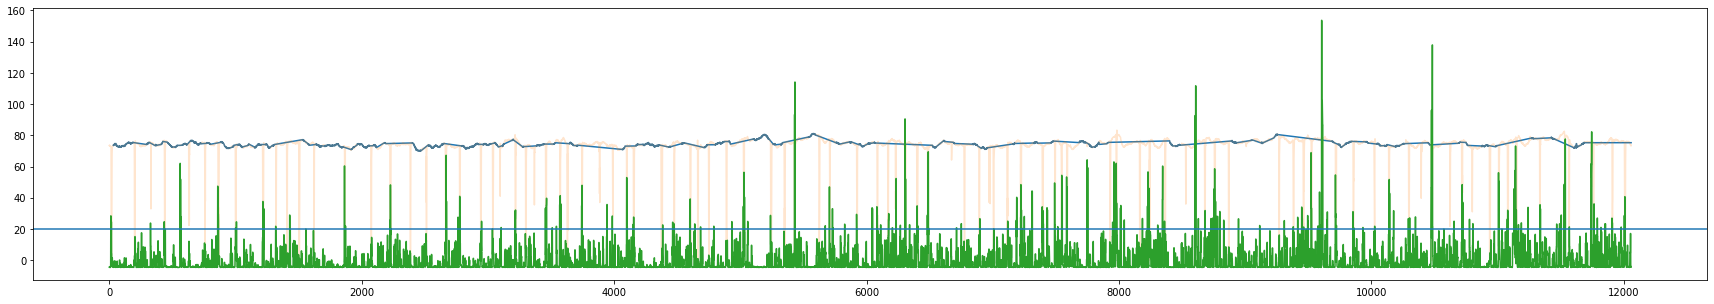

In [27]:
f, ax = plt.subplots(figsize=(30, 5))
ax.plot(d.gp.d_intp.values)
ax.plot(d.gp.diameter_mean.values, alpha=.2)
#ax.plot(d.gp.confidence_d.values*30)
#plt.axhline(.9*30)

ax.plot(d.gp.acceleration.values*10)
plt.axhline(2*10)

### 1. Load Data

In [6]:
path = glob(join(directory, 'raw_data', subject,
                         '20*_PSP_{0}_{1}'.format(subject,
                                                  session),
                         run, 'pupil_data'))

with open(path[0], 'rb') as f:
    file = pickle.load(f, encoding="latin-1")


### 2. resample to regular and aligned 125 Hz and limit each block to 5:185 seconds

In [7]:
pupil = pd.DataFrame(file['pupil_positions'])
time_zero = pupil.timestamp[0]   # reference timepoint

In [8]:
pupil.loc[:, 'time'] = np.round((pupil.timestamp - time_zero) * 1000)
pupil = pupil.set_index(pd.to_datetime(pupil['time'], unit='ms'))

In [9]:
left = pupil.loc[pupil.id ==0]
left = left.resample('ms').mean().interpolate('linear')
left = left.resample('8ms').mean()
left = left.loc[pd.Timestamp(5, unit='s'):pd.Timestamp(185, unit='s')]
assert left.diameter.isnull().mean() == 0

left = left.rename(columns = {'diameter': 'diameter_left',
                               'confidence': 'confidence_left'})


right = pupil.loc[pupil.id ==1]
right = right.resample('ms').mean().interpolate('linear')
right = right.resample('8ms').mean()
right = right.loc[pd.Timestamp(5, unit='s'):pd.Timestamp(185, unit='s')]
assert right.diameter.isnull().mean() == 0

right = right.rename(columns = {'diameter': 'diameter_right',
                               'confidence': 'confidence_right'})


In [10]:
# do the same for gaze data
gaze = pd.DataFrame(file['gaze_positions'])
gaze[['x', 'y']] = pd.DataFrame(gaze['norm_pos'].tolist(), index=gaze.index)

gaze.loc[:, 'time'] = np.round((gaze.timestamp - time_zero) * 1000)
gaze = gaze.set_index(pd.to_datetime(gaze['time'], unit='ms'))
gaze = gaze.resample('ms').mean().interpolate('linear')
gaze = gaze.resample('8ms').mean()
gaze = gaze.loc[pd.Timestamp(5, unit='s'):pd.Timestamp(185, unit='s')]

### 2. Calculate gaze distance, gaze velocity, and gaze acceleration

In [209]:
def velocity(df, unit, window=1):
    '''
    Assumes that entries along unit axis are evenly spaced in time
    If not, needs to be divided by temporal offset between points'''
    f = np.abs((df[unit].values - np.roll(df[unit].values, -window)))    
    b = np.abs((df[unit].values - np.roll(df[unit].values, window)))
    return np.maximum(f, b)


In [210]:
#gaze distance in euclidian space
x_diff = gaze.x.values - np.roll(gaze.x.values, 1)
x_diff[0] = 0

y_diff = gaze.y.values - np.roll(gaze.y.values, 1)
y_diff[0] = 0

gaze.loc[:, 'distance'] = np.sqrt(np.square(x_diff)+np.square(y_diff))
gaze.loc[:, 'velocity']=velocity(gaze, 'distance')
gaze.loc[:, 'acceleration']=velocity(gaze, 'velocity')



### 3. Mean pupil diameter and interpol based on confidence right, confidence left and acceleration as well as islands 

In [221]:
gp = pd.concat([gaze, left, right], axis=1)
t=.98
excel=.001

if (gp.confidence_right < t).mean() - (gp.confidence_left < t).mean() > .1:
    print('left')
    gp.loc[:, 'diameter_mean'] = gp.loc[:, 'diameter_left']
    gp.loc[:, 'diameter_blink'] = gp.loc[:, 'diameter_mean'].copy()
    gp.loc[(gp.acceleration > excel)&(gp.confidence > .98), 'diameter_blink'] = np.nan
    gp.loc[gp.confidence_left < t, 'diameter_blink'] = np.nan
    gp.loc[:, 'margin'] = gp.confidence_left
    gp.loc[gp.margin < .9, 'margin'] = np.nan
    gp.loc[:, 'margin'] = ~gp.margin.isnull()
    gp.loc[:, 'margin'] = margin(gp.margin.values, margin1=25, margin2=50, threshhold=2)
    gp.loc[gp.margin == False, 'diameter_blink'] = np.nan

elif (gp.confidence_left < t).mean() - (gp.confidence_right < t).mean() > .1:
    print('right')
    gp.loc[:, 'diameter_mean'] = gp.loc[:, 'diameter_right']
    gp.loc[:, 'diameter_blink'] = gp.loc[:, 'diameter_mean'].copy()
    gp.loc[(gp.acceleration > excel) &(gp.confidence > .98), 'diameter_blink'] = np.nan
    gp.loc[gp.confidence_right < t, 'diameter_blink'] = np.nan
    gp.loc[:, 'margin'] = gp.confidence_right
    gp.loc[gp.margin < .9, 'margin'] = np.nan
    gp.loc[:, 'margin'] = ~gp.margin.isnull()
    gp.loc[:, 'margin'] = margin(gp.margin.values, margin1=25, margin2=50, threshhold=2)
    gp.loc[gp.margin == False, 'diameter_blink'] = np.nan
    
else:
    print('mean')
    gp.loc[:, 'diameter_mean'] = gp.loc[:, ['diameter_right', 'diameter_left']].mean(axis=1)
    gp.loc[:, 'diameter_blink'] = gp.loc[:, 'diameter_mean'].copy()
    gp.loc[:, 'clean_side'] = np.nan
    #gp.loc[:, 'diameter_velo'] = velocity(gp, unit='diameter_mean', window=2)
    gp.loc[gp.acceleration > excel, 'diameter_blink'] = np.nan
    #gp.loc[gp.diameter_velo > 0.0005, 'diameter_blink'] = np.nan
    print(gp.diameter_blink.isnull().mean())
    gp.loc[(gp.confidence_left < t)|(gp.confidence_right < t), 'diameter_blink'] = np.nan
    #gp.loc[(gp.confidence_left < t)&(gp.confidence_right >= t), 'clean_side'] = 'right'
    #gp.loc[(gp.confidence_left >= t)&(gp.confidence_right < t), 'clean_side'] = 'left'

    #diff = gp.diameter_left.mean() - gp.diameter_right.mean()
    #gp.loc[(gp.clean_side == 'left')&(gp.acceleration < excel), 'diameter_blink'] = gp.loc[gp.clean_side == 'left', 'diameter_left'] - diff/2
    #gp.loc[(gp.clean_side == 'right')&(gp.acceleration < excel), 'diameter_blink'] = gp.loc[gp.clean_side == 'right', 'diameter_right'] + diff/2

    #gp.loc[:, 'margin'] = gp.confidence_left + gp.confidence_right
    #gp.loc[gp.margin < 1.2, 'margin'] = np.nan
    #gp.loc[:, 'margin'] = ~gp.margin.isnull()
    #gp.loc[:, 'margin'] = margin(gp.margin.values, margin1=20, margin2=20, threshhold=2)
    #gp.loc[gp.margin == False, 'diameter_blink'] = np.nan

    gp.loc[:, 'margin2'] = gp.confidence_left + gp.confidence_right
    gp.loc[gp.margin2 < 1.9, 'margin2'] = np.nan
    gp.loc[:, 'margin2'] = ~gp.margin2.isnull()
    gp.loc[:, 'margin2'] = margin(gp.margin2.values, margin1=25, margin2=50, threshhold=1)
    gp.loc[gp.margin2 == False, 'diameter_blink'] = np.nan


gp.diameter_blink.isnull().mean()

right


0.7794764677125461

In [212]:
def islands(array, threshhold=200):
    '''
    Detects leftover fragments smaller than threshhold.

    Sets those detected fragments to NaN to make linear interpolation cleaner.
    '''
    convolved = np.convolve(array, [0.5, 1], 'same')
    ev_start = np.where(convolved == .5)[0]
    fragment_ends = ev_start
    if convolved[0] != 0:
        fragment_ends = fragment_ends[1:len(fragment_ends)]
    if convolved[len(convolved) - 1] == 0:
        fragment_ends = np.append(fragment_ends, len(array))
    ev_end = np.where(convolved == 1)[0]
    if convolved[0] == 0:
        fragment_starts = np.append(0, ev_end)
    else:
        fragment_starts = ev_end
    if convolved[-1] == 1:
        fragment_starts = fragment_starts[0:-1]
    assert len(fragment_ends) == len(fragment_starts)
    fragment_length = fragment_ends - fragment_starts
    wh = np.where(fragment_length < threshhold)
    smallfrag_ends = fragment_ends[wh]
    smallfrag_starts = fragment_starts[wh]
    for start, end in zip(smallfrag_starts, smallfrag_ends):
        array[start:end + 1] = False
    return array

def margin(array, margin1=50, margin2=50, threshhold=50, op='larger'):
    '''
    Detect fragments of invalid samples of certain length,
    mark surrounding samples as invalid
    INPUT: boolean np.array; valid samples True & invalid samples FALSE
    ARGUMENTS:
        - margin 1: margin before fragment
        - margin 2: margin after fragment
        - threshhold: length of fragment of invalid samples
        - op: 'larger' or 'smaller'; how to use threshhold
    OUTPUT: boolean np.array; valid samples True & invalid samples FALSE
    '''
    convolved = np.convolve(array, [0.5, 1], 'same')                    # convolution marks begin of True-series with 0.5 and end of True-series with 1
    ev_start = np.where(convolved == .5)[0]
    fragment_ends = ev_start
    if convolved[0] != 0:
        fragment_ends = fragment_ends[1:len(fragment_ends)]
    if convolved[len(convolved) - 1] == 0:
        fragment_ends = np.append(fragment_ends, len(array))
    ev_end = np.where(convolved == 1)[0]
    if convolved[0] == 0:
        fragment_starts = np.append(0, ev_end)
    else:
        fragment_starts = ev_end
    if convolved[-1] == 1:
        fragment_starts = fragment_starts[0:-1]
    assert len(fragment_ends) == len(fragment_starts)
    fragment_length = fragment_ends - fragment_starts
    if op == 'larger':
        wh = np.where(fragment_length > threshhold)
    elif op == 'smaller':
        wh = np.where(fragment_length <= threshhold)
    smallfrag_ends = fragment_ends[wh]
    smallfrag_starts = fragment_starts[wh]
    for start, end in zip(smallfrag_starts, smallfrag_ends):
        array[start - margin1:start] = False
        array[end:end + margin2] = False
    return array


In [218]:
array = ~gp.diameter_blink.isnull()
array = islands(array, threshhold=5)
gp.loc[:, 'islands'] = array
gp.loc[gp.islands == False, 'diameter_blink'] = np.nan

gp.diameter_blink.isnull().mean()


0.9028932047464557

In [219]:
gp.loc[:, 'd_intp'] = gp.diameter_blink.interpolate('linear')

In [8]:
gp = pd.read_hdf('test/Pupil_Preprocessed_2022-01-02/Pupil_Preprocessed_SUB-024_Baseline_000.hdf', key='Pupil')

## B) run as script on all subjects

#### dataset

In [16]:
runs = {
    '001': {'Baseline': ['000', '001', '002'],
            'Followup': ['001', '002', '004']},
    '002': {'Baseline': ['001', '002', '003'],  # welche 3
            'Followup': None},
    '007': {'Baseline': ['000', '001', '002'],
            'Followup': ['000', '001', '002']},
    '010': {'Baseline': ['000', '001', '002'],
            'Followup': ['004', '005', '006']},
    '012': {'Baseline': ['000', '001', '002'],
            'Followup': ['000', '001', '002']},
    '013': {'Baseline': ['000', '001', '002'],
            'Followup': None},
    '014': {'Baseline': ['000', '001', '002'],
            'Followup': None},
    '018': {'Baseline': ['001', '003', '004'],
            'Followup': ['000', '001', '002']},
    '019': {'Baseline': ['000', '001', '002'],
            'Followup': ['001', '002', '003']},
    '020': {'Baseline': ['000', '001', '002'], 
            'Followup': ['000', '001', '002']},
    '021': {'Baseline': ['001', '002', '003'],
            'Followup': None},
    '023': {'Baseline': ['000', '001', '003'],
            'Followup': None},
    '025': {'Baseline': ['000', '001', '002'],
            'Followup': None},
    '026': {'Baseline': ['000', '001', '002'],
            'Followup': None},
    '003': {'Baseline': ['000', '001', '002'],
            'Followup': ['000', '001', '002']},
    '006': {'Baseline': ['000', '001', '004'],
            'Followup': ['000', '001', '002']},
    '009': {'Baseline': ['000', '001', '002'],
            'Followup': None},
    '016': {'Baseline': ['000', '001', '002'],
            'Followup': ['001', '002', '003']},
    '022': {'Baseline': ['000', '001', '002'],
            'Followup': None},
    '024': {'Baseline': ['000', '001', '002'],
            'Followup': None}
}

In [29]:
clean_dict=[]
for sub, dic in runs.items():
    for session, lis in dic.items():
        if lis is None:
            print(None)
        else:
            for run in lis:
                print(sub, session, run)
                pupil = PS.execute(sub, 'patient', session, run, out_dir='.', islands=10, excel_thresh=2)
                entry={'subject':sub,
                      'session':session,
                      'run':run,
                      'clean':pupil.gp.diameter_blink.isnull().mean()}
                clean_dict.append(entry)

001 Baseline 000
001 Baseline 001
001 Baseline 002
001 Followup 001
001 Followup 002
001 Followup 004
002 Baseline 001
002 Baseline 002
002 Baseline 003
None
007 Baseline 000
007 Baseline 001
007 Baseline 002
007 Followup 000
007 Followup 001
007 Followup 002
010 Baseline 000
010 Baseline 001
010 Baseline 002
010 Followup 004
010 Followup 005
010 Followup 006
012 Baseline 000
012 Baseline 001
012 Baseline 002
012 Followup 000
012 Followup 001
012 Followup 002
013 Baseline 000
013 Baseline 001
013 Baseline 002
None
014 Baseline 000
014 Baseline 001
014 Baseline 002
None
018 Baseline 001
018 Baseline 003
018 Baseline 004
018 Followup 000
018 Followup 001
018 Followup 002
019 Baseline 000
019 Baseline 001
019 Baseline 002
019 Followup 001
019 Followup 002
019 Followup 003
020 Baseline 000
020 Baseline 001
020 Baseline 002
020 Followup 000
020 Followup 001
020 Followup 002
021 Baseline 001
021 Baseline 002
021 Baseline 003
None
023 Baseline 000
023 Baseline 001
023 Baseline 003
None
025 Ba

In [30]:
blink = pd.DataFrame(clean_dict)

In [31]:
blink.loc[blink.clean > .5]

Empty DataFrame
Columns: [subject, session, run, clean]
Index: []

In [59]:
#check sampling frequencies in each run

fr = []
for sub, dic in runs.items():
    for session, lis in dic.items():
        if lis is None:
            print(None)
        else:
            for run in lis:
                print(sub, session, run)
                path = glob(join(directory, 'raw_data', sub,
                         '20*_PSP_{0}_{1}'.format(sub,
                                                  session),
                         run, 'pupil_data'))

                with open(path[0], 'rb') as f:
                    file = pickle.load(f, encoding="latin-1")
                    
                pupil = pd.DataFrame(file['pupil_positions'])
                time_zero = pupil.timestamp[0]   # reference timepoint
                p = pupil.loc[pupil.id == 0]
                diff = np.diff(p.timestamp.values - time_zero)
                print((1/diff).mean())
                fr.append((1/diff).mean())
np.array(fr)

AttributeError: 'list' object has no attribute 'items'

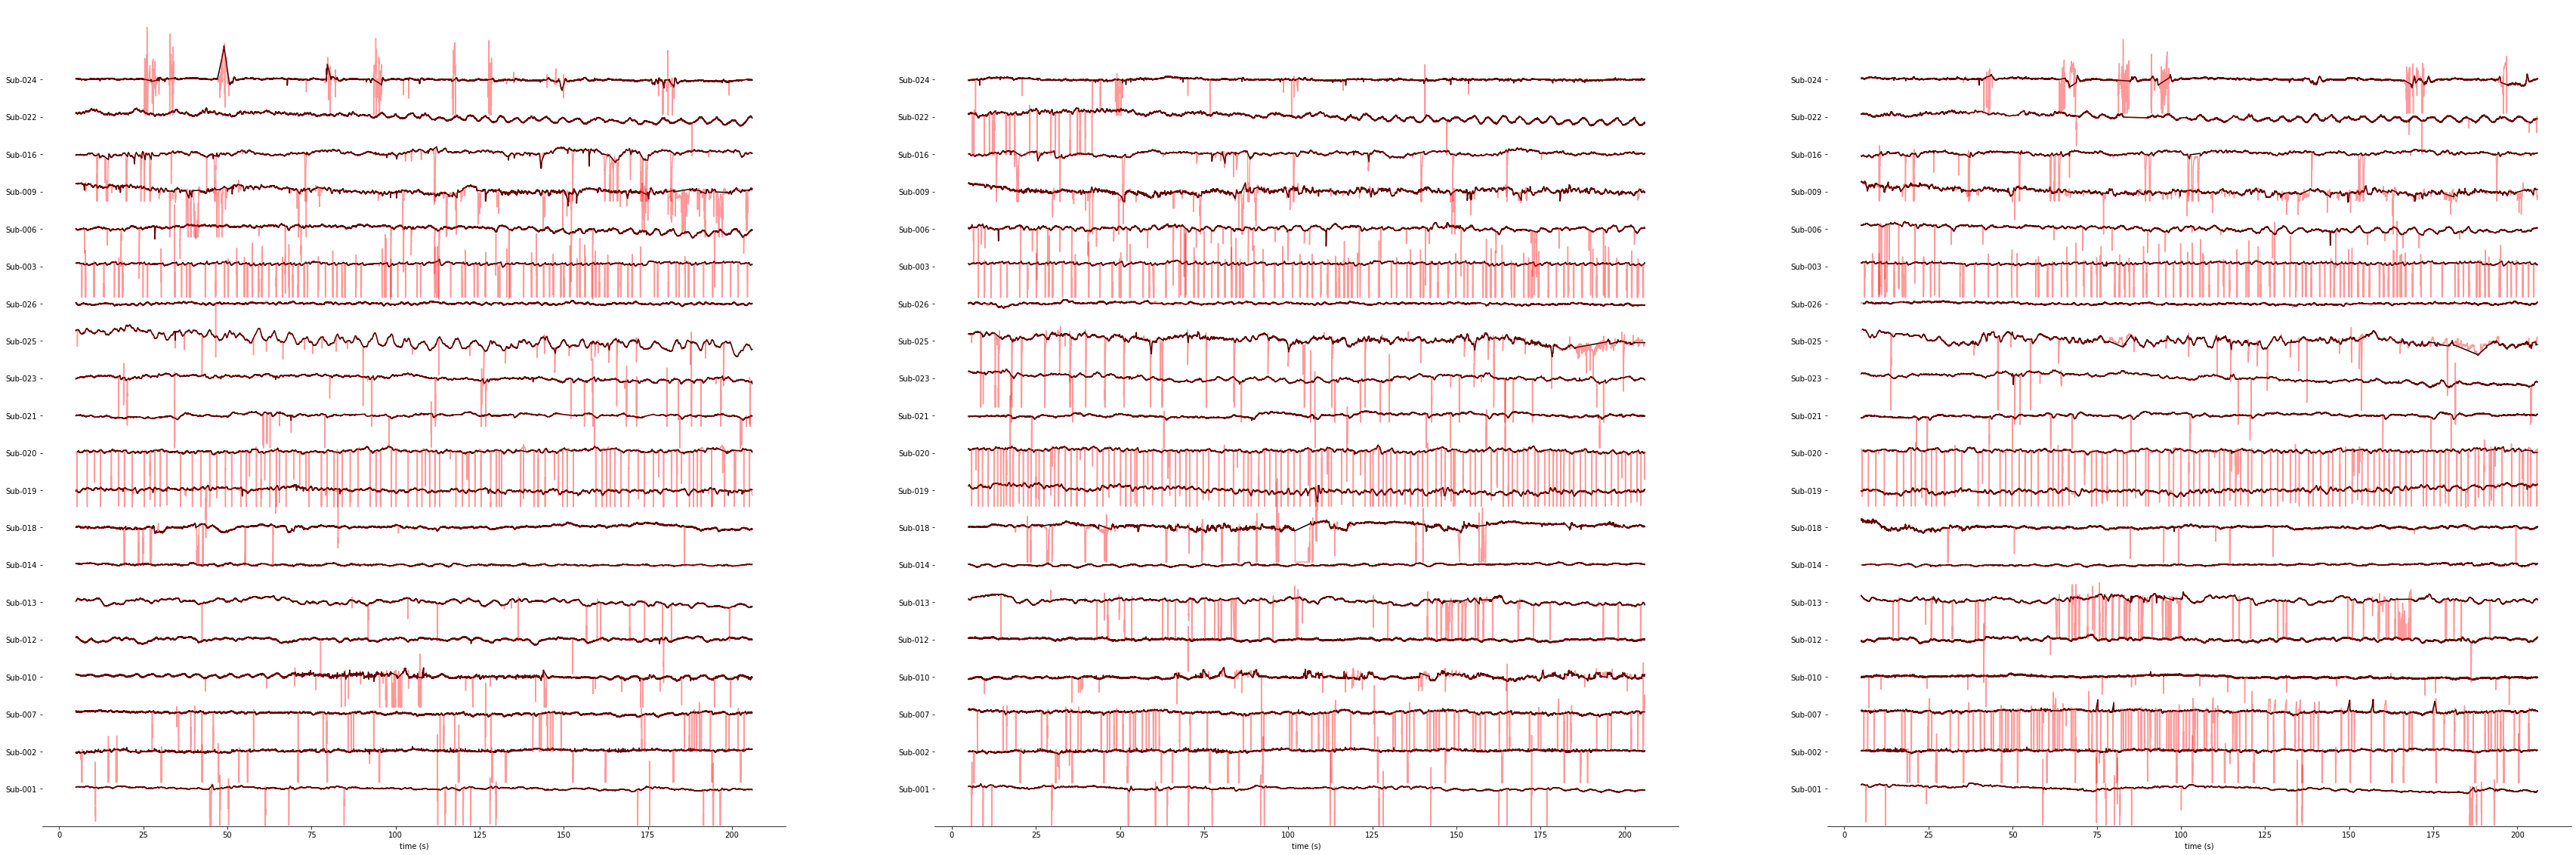

In [32]:
list_subs = list(runs.keys())
f, ax = plt.subplots(1, 3, figsize=(60, 20))

run = 'Pupil_Preprocessed_2022-02-25'



for i, sub in enumerate(list_subs):
    rs = runs[sub]['Baseline']
    data = pd.read_hdf(join(run, 'patient', 'Pupil_Preprocessed_SUB-{0}_Baseline_{1}.hdf'.format(sub, rs[0])))
    orig = data.diameter_mean.values
    d_intp = data.d_intp.values
    ax[0].plot(d_intp - orig.mean() + i*50, color='black')
    ax[0].plot(orig - orig.mean() + i*50, color='red', alpha=.4)
    
    data = pd.read_hdf(join(run, 'patient','Pupil_Preprocessed_SUB-{0}_Baseline_{1}.hdf'.format(sub, rs[1])))
    orig = data.diameter_mean.values
    d_intp = data.d_intp.values
    ax[1].plot(d_intp - orig.mean() + i*50, color='black')
    ax[1].plot(orig - orig.mean() + i*50, color='red', alpha=.4)
   
    try:
        data = pd.read_hdf(join(run,'patient', 'Pupil_Preprocessed_SUB-{0}_Baseline_{1}.hdf'.format(sub, rs[2])))
        orig = data.diameter_mean.values
        d_intp = data.d_intp.values
        ax[2].plot(d_intp - orig.mean() + i*50, color='black')
        ax[2].plot(orig - orig.mean() + i*50, color='red', alpha=.4)
    except IndexError:
        print('no run for {}'.format(sub))

for a in ax:
    a.set(ylim = (-50, 1050), 
          yticks=np.arange(0, 1000, 50), 
          yticklabels=['Sub-{}'.format(i) for i in list(runs.keys())],
          xticks = np.arange(-5, 210, 25)*60, 
          xticklabels=np.arange(0, 205, 25), 
          xlabel='time (s)')

sns.despine(left=True)
#f.savefig(join(run, 'Preprocessing_patients.png'), dpi=600)

In [35]:
np.arange(-5, 190, 25)*125

array([ -625,  2500,  5625,  8750, 11875, 15000, 18125, 21250])

## Control Subjects

In [14]:
sub_runs = {'02': ['000', '001', '002'],
 '03': ['000', '001', '002'],
 '04': ['000', '001', '002'],
 '05': ['000', '001', '002'],
 '06': ['001', '002', '003'],
 '07': ['000', '001', '002'],
 '08': ['000', '001', '002'],
 '09': ['000', '001', '002'],
 '10': ['000', '001', '002'],
 '11': ['000', '001', '002'],
 '12': ['000', '001', '002'],
 '13': ['000', '001', '002']}

subs=['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13']
runs =  ['000', '001', '002']

In [16]:
session = 'Baseline'
directory='/Volumes/XKCD/PSP'
for sub in sub_runs:
    for run in runs:
        pupil = PS.execute(sub, 'control', session, run, out_dir='.', islands=10)
        
pupil = PS.execute('06', 'control', session, '003', out_dir='.', directory=directory, islands=10)

/Volumes/XKCD/PSP/control/*K02/000/pupil_data
/Volumes/XKCD/PSP/control/*K02/001/pupil_data
/Volumes/XKCD/PSP/control/*K02/002/pupil_data
/Volumes/XKCD/PSP/control/*K03/000/pupil_data
Confidence equal in both eyes
/Volumes/XKCD/PSP/control/*K03/001/pupil_data
/Volumes/XKCD/PSP/control/*K03/002/pupil_data
/Volumes/XKCD/PSP/control/*K04/000/pupil_data
/Volumes/XKCD/PSP/control/*K04/001/pupil_data
/Volumes/XKCD/PSP/control/*K04/002/pupil_data
/Volumes/XKCD/PSP/control/*K05/000/pupil_data
Confidence equal in both eyes
/Volumes/XKCD/PSP/control/*K05/001/pupil_data
/Volumes/XKCD/PSP/control/*K05/002/pupil_data
/Volumes/XKCD/PSP/control/*K06/000/pupil_data
File Error for 06 Baseline 000
/Volumes/XKCD/PSP/control/*K06/001/pupil_data
/Volumes/XKCD/PSP/control/*K06/002/pupil_data
/Volumes/XKCD/PSP/control/*K07/000/pupil_data
/Volumes/XKCD/PSP/control/*K07/001/pupil_data
/Volumes/XKCD/PSP/control/*K07/002/pupil_data
/Volumes/XKCD/PSP/control/*K08/000/pupil_data
/Volumes/XKCD/PSP/control/*K08/001/

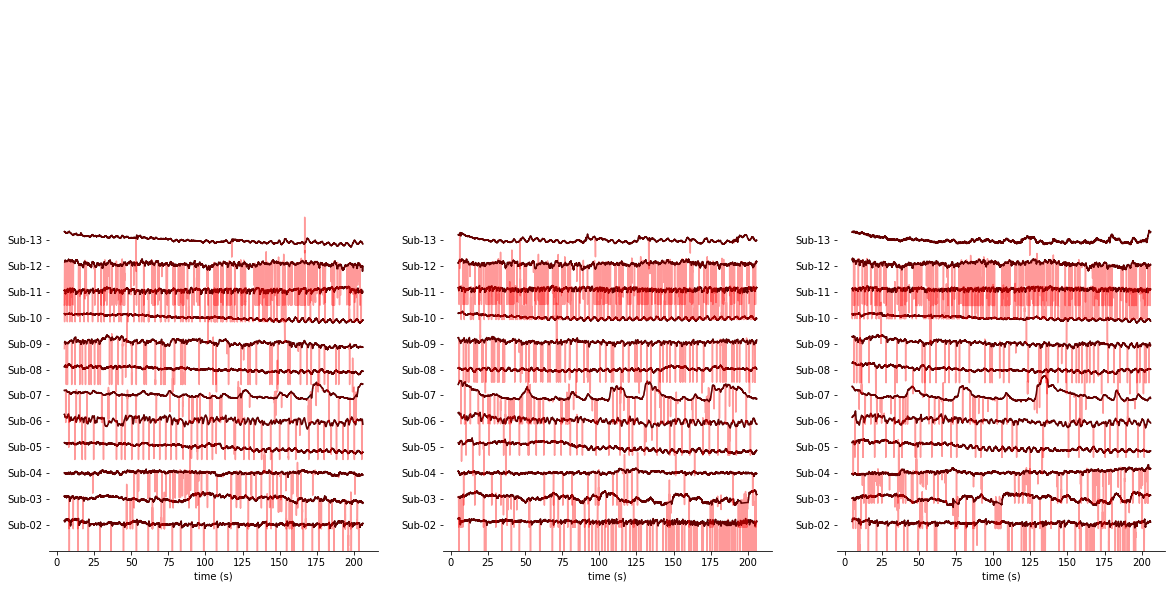

In [18]:
list_subs = list(sub_runs.keys())
f, ax = plt.subplots(1, 3, figsize=(20, 10))

run = 'Pupil_Preprocessed_2022-02-11'

for i, sub in enumerate(list_subs):
    rs = sub_runs[sub]
    data = pd.read_hdf(join(run, 'control', 'Pupil_Preprocessed_SUB-{0}_Baseline_{1}.hdf'.format(sub, rs[0])))
    orig = data.diameter_mean.values
    d_intp = data.d_intp.values
    ax[0].plot(d_intp - orig.mean() + i*50, color='black')
    ax[0].plot(orig - orig.mean() + i*50, color='red', alpha=.4)
    
    data = pd.read_hdf(join(run, 'control','Pupil_Preprocessed_SUB-{0}_Baseline_{1}.hdf'.format(sub, rs[1])))
    orig = data.diameter_mean.values
    d_intp = data.d_intp.values
    ax[1].plot(d_intp - orig.mean() + i*50, color='black')
    ax[1].plot(orig - orig.mean() + i*50, color='red', alpha=.4)
   
    try:
        data = pd.read_hdf(join(run, 'control','Pupil_Preprocessed_SUB-{0}_Baseline_{1}.hdf'.format(sub, rs[2])))
        orig = data.diameter_mean.values
        d_intp = data.d_intp.values
        ax[2].plot(d_intp - orig.mean() + i*50, color='black')
        ax[2].plot(orig - orig.mean() + i*50, color='red', alpha=.4)
    except IndexError:
        print('no run for {}'.format(sub))

for a in ax:
    a.set(ylim = (-50, 1000), 
          yticks=np.arange(0, 600, 50), 
          yticklabels=['Sub-{}'.format(i) for i in list(sub_runs.keys())],
          xticks = np.arange(-5, 210, 25)*60, 
          xticklabels=np.arange(0, 205, 25), 
          xlabel='time (s)')

sns.despine(left=True)
f.savefig(join(run, 'Preprocessing_Controls.png'), dpi=600)

### Pupil difference


In [31]:
edition = 'Pupil_Preprocessed_2022-02-11'

In [46]:
concat = []
for sub, dic in runs.items():
    for session, lis in dic.items():
        if lis is None:
            print(None)
        else:
            for i, run in enumerate(lis):
                print(sub, session, run)
                d = pd.read_hdf(join(edition, 'patient', 'Pupil_Preprocessed_SUB-{0}_{1}_{2}.hdf'.format(sub, session, run)))
                d.loc[:, 'subject'] = sub
                d.loc[:, 'session'] = session
                d.loc[:, 'run'] = i
                d.loc[:, 'group'] = 'patient'
                concat.append(d)
for sub, runs in sub_runs.items():
    for i, run in enumerate(runs):
        session = 'Baseline'
        d = pd.read_hdf(join(edition, 'control', 'Pupil_Preprocessed_SUB-{0}_{1}_{2}.hdf'.format(sub, session, run)))
        d.loc[:, 'subject'] = sub
        d.loc[:, 'session'] = session
        d.loc[:, 'run'] = i
        d.loc[:, 'group'] = 'control'
        concat.append(d)


001 Baseline 000
001 Baseline 001
001 Baseline 002
001 Followup 001
001 Followup 002
001 Followup 004
002 Baseline 001
002 Baseline 002
002 Baseline 003
None
007 Baseline 000
007 Baseline 001
007 Baseline 002
007 Followup 000
007 Followup 001
007 Followup 002
010 Baseline 000
010 Baseline 001
010 Baseline 002
010 Followup 004
010 Followup 005
010 Followup 006
012 Baseline 000
012 Baseline 001
012 Baseline 002
012 Followup 000
012 Followup 001
012 Followup 002
013 Baseline 000
013 Baseline 001
013 Baseline 002
None
014 Baseline 000
014 Baseline 001
014 Baseline 002
None
018 Baseline 001
018 Baseline 003
018 Baseline 004
018 Followup 000
018 Followup 001
018 Followup 002
019 Baseline 000
019 Baseline 001
019 Baseline 002
019 Followup 001
019 Followup 002
019 Followup 003
020 Baseline 000
020 Baseline 001
020 Baseline 002
020 Followup 000
020 Followup 001
020 Followup 002
021 Baseline 001
021 Baseline 002
021 Baseline 003
None
023 Baseline 000
023 Baseline 001
023 Baseline 003
None
025 Ba

In [86]:
con = pd.concat(concat)

In [87]:
con.loc[:, 'difference'] = con.diameter_left - con.diameter_right

In [88]:
con.loc[con.confidence_left < .98, 'difference'] = np.nan
con.loc[con.confidence_right < .98, 'difference'] = np.nan

In [89]:

diff_ = con.loc[con.session == 'Baseline'].groupby(['subject', 'run', 'group']).std().difference.reset_index()

In [90]:
diff_ = diff_.groupby(['subject', 'group']).mean().reset_index()

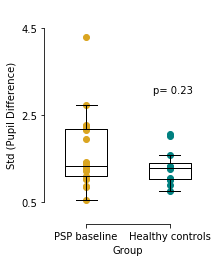

In [111]:
f, ax=plt.subplots(figsize=(3, 4))

patient_diff = diff_.loc[diff_.group == 'patient', 'difference'].values
control_diff = diff_.loc[diff_.group == 'control', 'difference'].values


ax.scatter(np.zeros(patient_diff.shape), patient_diff, color=baseline_color)
ax.scatter(np.ones(control_diff.shape), control_diff, color=control_color)
ax.boxplot(control_diff, positions=[1], widths=.5, 
           medianprops = dict(linestyle='-', linewidth=1, color='black'),
          showfliers=False)
ax.boxplot(patient_diff, positions=[0], widths=.5, 
           medianprops = dict(linestyle='-', linewidth=1, color='black'),
          showfliers=False)

ax.set(xlabel='Group',
      xticks=[0,1],
      xticklabels=['PSP baseline',
                  'Healthy controls'],
      ylabel='Std (Pupil Difference)',
      ylim=[0, 5],
      yticks=[0.5,2.5, 4.5])
ax.annotate('p= %.2f' % ttest_ind(patient_diff, control_diff)[1], xy=(.8,3))
sns.despine(trim=True)
f.savefig(join(edition, 'std_pupil_diff_patient_control.png'), dpi=600)


#### Noise / Stats

In [92]:
df= pd.read_hdf('Pupil_Preprocessed_2022-01-09/Pupil_Preprocessed_SUB-02_Baseline_000.hdf')

In [95]:
df['diameter_diff'] = df.diameter_left - df.diameter_right

In [96]:
df.diameter_diff.std()

4.3608769487065056

In [8]:
pupil = PS.execute(sub, 'control', session, run, out_dir='.', directory=directory)

/Volumes/XKCD/PSP/control/*K01/000/pupil_data


ValueError: unregistered extension code 1920299944

In [24]:
sub = '01'
run = '000'
session = 'Baseline'
directory = '/Volumes/XKCD/PSP/'

In [25]:
path = glob(join('/Volumes/XKCD/PSP/control/*K01/000/pupil_data'))

In [26]:
path = glob(join(directory, 'controls',
                             '*K{}'.format(sub),
                             
                 run, 'pupil_data'))

In [29]:
with open(path[0], 'rb') as f:
    file = pickle.load(f, encoding="latin-1")

ValueError: unregistered extension code 1920299944

In [20]:
pupil = pd.DataFrame(file['pupil_positions'])
gaze = pd.DataFrame(file['gaze_positions'])
gaze[['x', 'y']] = pd.DataFrame(gaze['norm_pos'].tolist(), index=gaze.index)


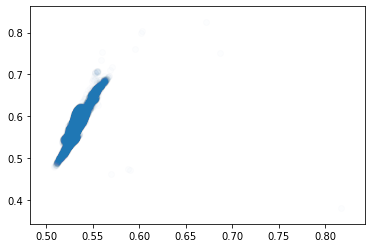

In [24]:
plt.scatter(gaze.x.values, gaze.y.values, alpha=.01)

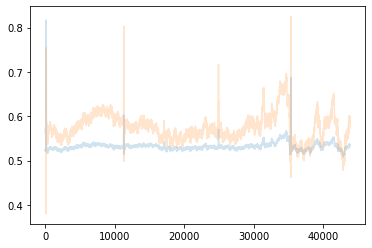

In [27]:
plt.plot(gaze.x.values, alpha=.2)
plt.plot(gaze.y.values, alpha=.2)

In [55]:
d = pd.read_hdf('Pupil_Preprocessed_2022-01-09/Pupil_Preprocessed_SUB-10_Baseline_000.hdf', key='Pupil')

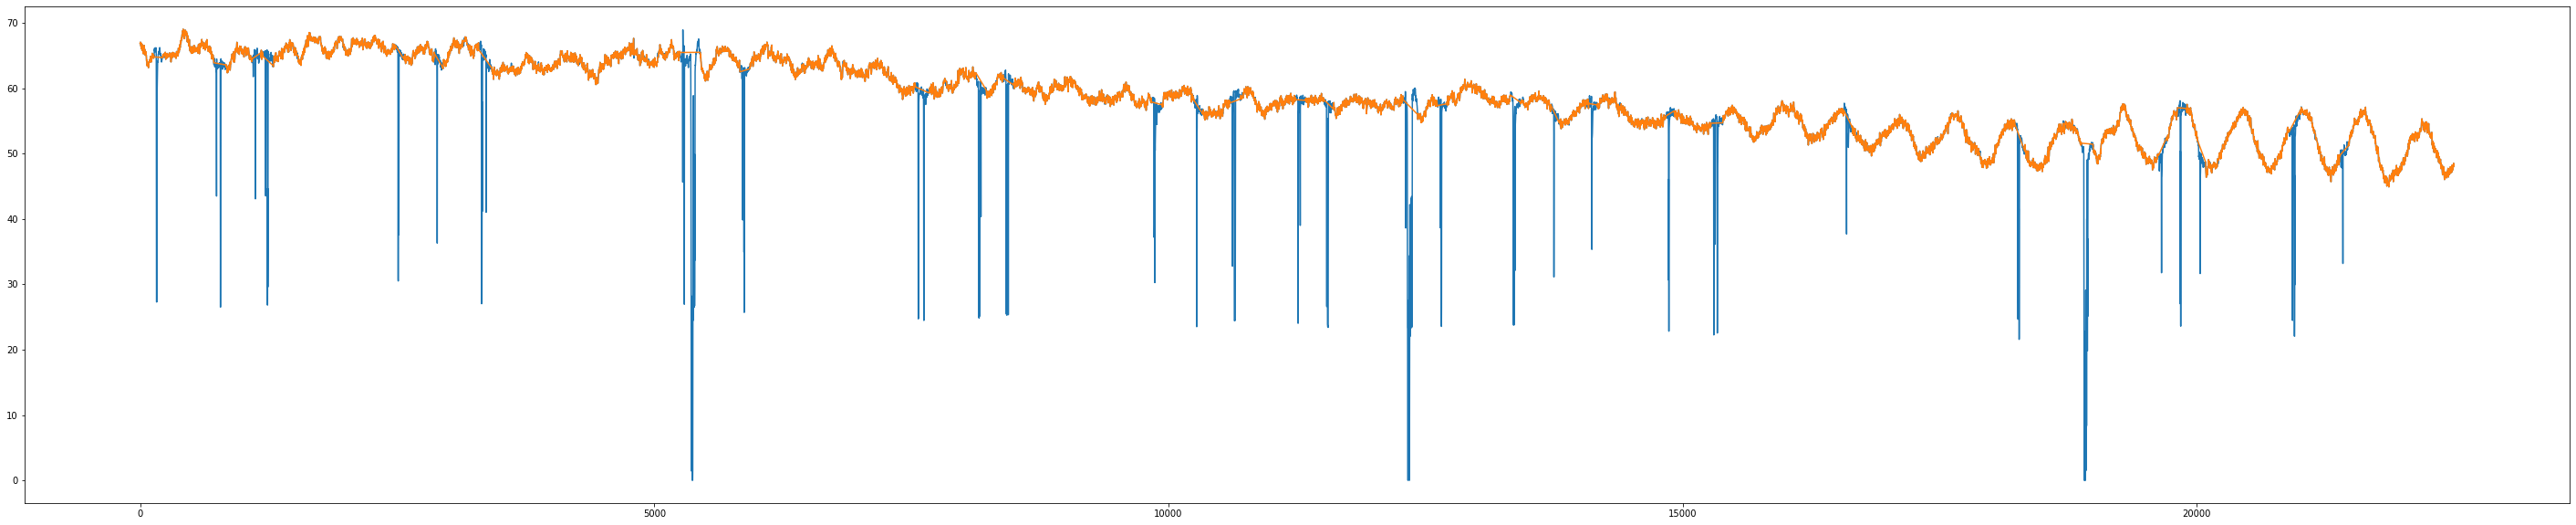

In [57]:
f, ax = plt.subplots(figsize=(50, 10))
plt.plot(d.diameter_mean.values)
plt.plot(d.d_intp.values)

In [7]:
pd.DataFrame([{'subject': '001', 'ehi': 'rechts', 'flasche': 'rechts', 'triangle':'rechts'},
{'subject': '002', 'ehi': 'rechts', 'flasche': 'links ', 'triangle':'links'},
{'subject': '003', 'ehi': 'rechts', 'flasche': 'rechts', 'triangle':'rechts'},
{'subject': '006', 'ehi': 'rechts', 'flasche': 'links ', 'triangle':'links'},
{'subject': '007', 'ehi': 'rechts', 'flasche': 'rechts', 'triangle':'rechts'},
{'subject': '009', 'ehi': 'rechts', 'flasche': 'rechts', 'triangle':'rechts'},
{'subject': '010', 'ehi': 'rechts', 'flasche': 'links ', 'triangle':'rechts'},
{'subject': '012', 'ehi': 'rechts', 'flasche': 'links ', 'triangle':'links'},
{'subject': '013', 'ehi': 'rechts', 'flasche': 'links ', 'triangle':'links'},
{'subject': '014', 'ehi': 'rechts', 'flasche': 'links ', 'triangle':'links'},
{'subject': '016', 'ehi': 'rechts', 'flasche': 'rechts', 'triangle':'rechts'},
{'subject': '018', 'ehi': 'rechts', 'flasche': 'rechts', 'triangle':'rechts'},
{'subject': '019', 'ehi': 'rechts', 'flasche': 'rechts', 'triangle':'rechts'},
{'subject': '020', 'ehi': 'rechts', 'flasche': 'rechts', 'triangle':'rechts'},
{'subject': '021', 'ehi': 'rechts', 'flasche': 'links ', 'triangle':'links'},
{'subject': '022', 'ehi': 'rechts', 'flasche': 'rechts', 'triangle':'rechts'},
{'subject': '023', 'ehi': 'rechts', 'flasche': 'links ', 'triangle':'links'},
{'subject': '024', 'ehi': 'rechts', 'flasche': 'links ', 'triangle':'links'},
{'subject': '025', 'ehi': 'rechts', 'flasche': 'links ', 'triangle':'links'},
{'subject': '026', 'ehi': 'rechts', 'flasche': 'rechts', 'triangle':'rechts'}]).to_hdf('/Users/kenohagena/PSP/code/pspupil/side_preference.hdf',
                                                                                      key='side_preference')

## Preprocessing Mollys data

### 1. Two subjects in old format

In [14]:
start=5
end=210
excel_thresh=3
confidence_thresh=.9
islands=10
margin1=10
margin2=10

In [227]:
sub = '028'
run = '000'

In [228]:
pupil = pd.read_csv('/Volumes/psp_data/PSP_{0}/PSP_{0}_baseline_rest_{1}/pupil_positions.csv'.format(sub, run))
gaze = pd.read_csv('/Volumes/psp_data/PSP_{0}/PSP_{0}_baseline_rest_{1}/gaze_positions.csv'.format(sub, run))

In [305]:
pp = PS.PupilFrame(sub, 'molly', 'Baseline', run, directory='/Volumes/psp_data/')

In [306]:
pp.pupil['left'] = pupil.loc[pupil.id == 0].drop(['norm_pos_x', 'norm_pos_y'], axis=1)
pp.pupil['right'] = pupil.loc[pupil.id == 1].drop(['norm_pos_x', 'norm_pos_y'], axis=1)
pp.pupil['gaze'] = gaze

In [307]:
gaze.timestamp.iloc[-1]-gaze.timestamp.iloc[0] 

212.81400992

In [310]:
#cut_resample
start=5
end=210
time_zero = np.min([pp.pupil['left'].iloc[0].timestamp,
                            pp.pupil['right'].iloc[0].timestamp,
                            pp.pupil['gaze'].iloc[0].timestamp])                    # reference timepoint
for side in ['left', 'right', 'gaze']:
    df = pp.pupil[side]
    df.loc[:, 'time'] =\
        np.round((df.timestamp - time_zero) * 1000)
    print(df.time)
    df = df.set_index(pd.to_datetime(df['time'], unit='ms'))
    df = df.resample('ms').mean().interpolate('linear')          # upsample to 'ms'
    df = df.resample('17ms').mean()                              # downsample to 60Hz
    df = df.loc[pd.Timestamp(start, unit='s'):pd.Timestamp(end, unit='s')]
    new_cols = {'diameter': 'diameter_{}'.format(side),
                'confidence': 'confidence_{}'.format(side),
                'norm_pos_x': 'x',
               'norm_pos_y': 'y'}

    df = df.rename(columns=new_cols)
    pp.pupil[side] = df
pp.gp = pd.concat([pp.pupil['left'], pp.pupil['right'],
                     pp.pupil['gaze']], axis=1)

time
1970-01-01 00:00:05.015         1.0
1970-01-01 00:00:05.032        18.0
1970-01-01 00:00:05.049        35.0
1970-01-01 00:00:05.066        52.0
1970-01-01 00:00:05.083        69.0
                             ...   
1970-01-01 00:03:24.901    199887.0
1970-01-01 00:03:24.918    199904.0
1970-01-01 00:03:24.935    199921.0
1970-01-01 00:03:24.952    199938.0
1970-01-01 00:03:24.969    199947.0
Freq: 17L, Name: time, Length: 11763, dtype: float64
time
1970-01-01 00:00:05.015         0.0
1970-01-01 00:00:05.032        17.0
1970-01-01 00:00:05.049        34.0
1970-01-01 00:00:05.066        52.0
1970-01-01 00:00:05.083        69.0
                             ...   
1970-01-01 00:03:24.901    199887.0
1970-01-01 00:03:24.918    199903.0
1970-01-01 00:03:24.935    199921.0
1970-01-01 00:03:24.952    199937.0
1970-01-01 00:03:24.969    199946.0
Freq: 17L, Name: time, Length: 11763, dtype: float64
time
1970-01-01 00:00:05.015         0.0
1970-01-01 00:00:05.032        17.0
1970-01-01 00:0

In [68]:
pp.excel()

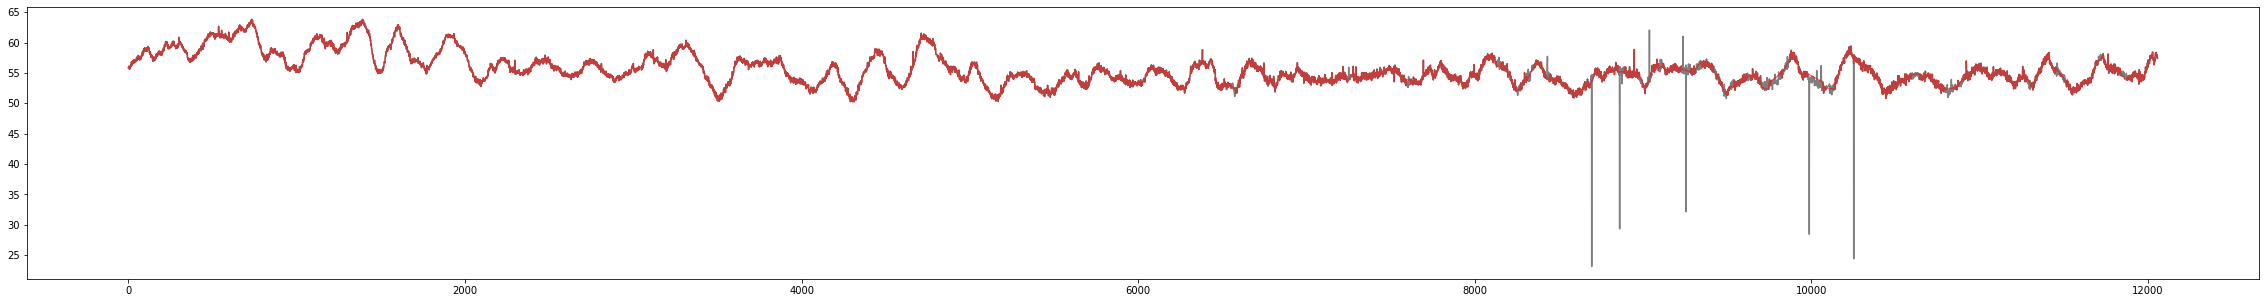

In [69]:
excel_thresh=np.quantile(pp.gp.acceleration.abs().values, .99)
pp.discard_interp(excel_thresh=excel_thresh, confidence_thresh=confidence_thresh,
                     islands=islands, margin2=margin2, margin1=margin1)
f, ax = plt.subplots(figsize=(40, 5))
ax.plot(pp.gp.diameter_mean.values, color='black', alpha=.5)
ax.plot(pp.gp.d_intp.values, color='red', alpha=.5)

In [70]:
pp.normalize()
pp.gp =pp.gp.loc[:, ['x', 'y', 'confidence_left', 'diameter_left', 'confidence_right', 'diameter_right', 'distance', 'velocity', 'acceleration', 'notes',
       'diameter_mean', 'confidence_d', 'diameter_blink', 'margin', 'islands',
       'd_intp', 'biz']]
          
print(pp.gp.columns)

pp.gp.to_hdf(join(pp.out_dir, 'Pupil_Preprocessed_SUB-{0}_{1}_{2}.hdf'.
                    format(pp.subject,
                           pp.session,
                           pp.run)), key='Pupil')

Index(['x', 'y', 'confidence_left', 'diameter_left', 'confidence_right',
       'diameter_right', 'distance', 'velocity', 'acceleration', 'notes',
       'diameter_mean', 'confidence_d', 'diameter_blink', 'margin', 'islands',
       'd_intp', 'biz'],
      dtype='object')


### New Format


0.002551020408163265 0.0022168711539196574 d0
0.39241166783953074
0.8


(0, 5)

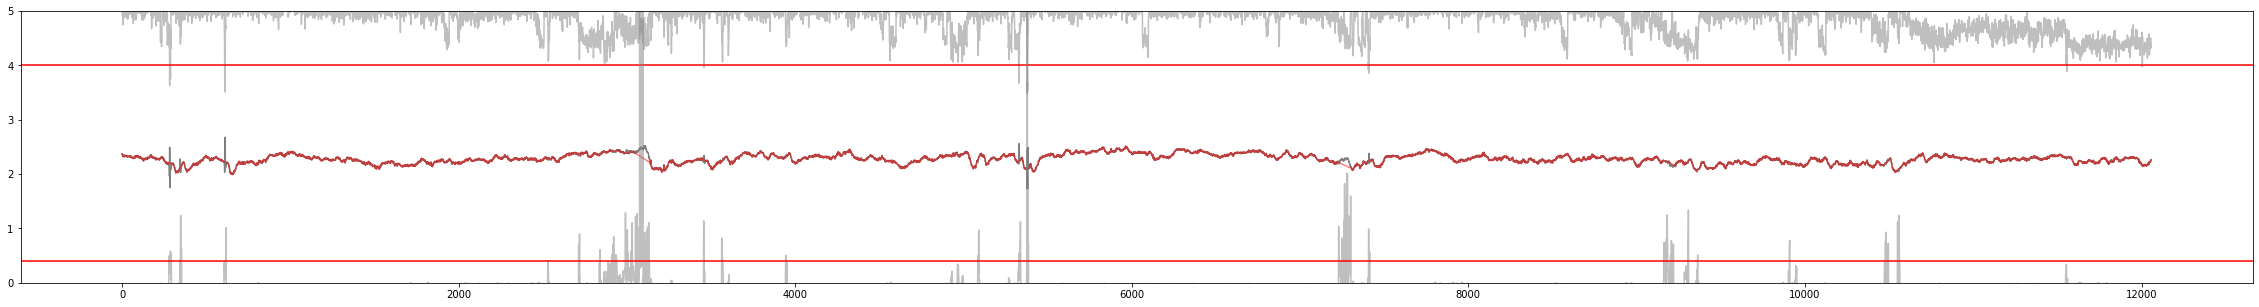

In [41]:
start=5
end=210
excel_thresh_quant=.98
confidence_thresh=.8
islands=5
margin1=5
margin2=5

sub = '041'
r = 3
run = '00{}'.format(r+1)
pp = PS.PupilFrame(sub, 'molly', 'Baseline', run, directory='/Volumes/psp_data/')

import scipy.io
mat = scipy.io.loadmat('/Volumes/psp_data/PSP_{0}/sub-PSP_{0}_ses-S001_task-rest_00{2}_run-{1}_prepared.mat'.format(sub, run, r))

d1 = pd.DataFrame({'time': mat['eye'][0][0][1][0][1][0],
 'diameter': mat['eye'][0][0][3][0][1][0],
 'confidence': mat['eye'][0][0][2][0][1][0],
 'x': mat['eye'][0][0][4][0][1][0],
 'y': mat['eye'][0][0][5][0][1][0]})
d1.head()

d0 = pd.DataFrame({'time': mat['eye'][0][0][1][0][0][0],
 'diameter': mat['eye'][0][0][3][0][0][0],
 'confidence': mat['eye'][0][0][2][0][0][0],
 'x': mat['eye'][0][0][4][0][0][0],
 'y': mat['eye'][0][0][5][0][0][0]})
d0.head()

l = (d1.confidence < confidence_thresh).mean()
r = (d0.confidence < confidence_thresh).mean()
if l < r:
    d = d1
    print(l, r, 'd0')
elif l > r:
    d = d0
    print(l, r, 'd0')


d=d1


#cut_resample
start=5
end=210
time_zero = d.iloc[0].time     # reference timepoint

d.loc[:, 'time'] =\
    np.round((d.time - time_zero)*1000)
d = d.set_index(pd.to_datetime(d['time'], unit='ms'))

d = d.resample('ms').mean().interpolate('linear')          # upsample to 'ms'
d = d.resample('17ms').mean()                              # downsample to 60Hz
d = d.loc[pd.Timestamp(start, unit='s'):pd.Timestamp(end, unit='s')]


#excel

x_diff = d.x.values - np.roll(d.x.values, 1)
x_diff[0] = 0

y_diff = d.y.values - np.roll(d.y.values, 1)
y_diff[0] = 0
d.loc[:, 'distance'] =\
    np.sqrt(np.square(x_diff) + np.square(y_diff))
d.loc[:, 'velocity'] = PS.derivative(d, 'distance')
d.loc[:, 'acceleration'] = PS.derivative(d, 'velocity')
d.loc[:, 'acceleration'] = (d.loc[:, 'acceleration'] - d.loc[:, 'acceleration'].mean()) / d.loc[:, 'acceleration'].std()


new_cols = {'diameter': 'diameter_mean',
                'confidence': 'confidence_d'}

pp.gp = d.rename(columns=new_cols)

excel_thresh=np.quantile(pp.gp.acceleration.abs().values, excel_thresh_quant)
print(excel_thresh)
pp.discard_interp_(excel_thresh=excel_thresh, confidence_thresh=confidence_thresh,
                     islands=islands, margin2=margin2, margin1=margin1)
f, ax = plt.subplots(figsize=(40, 5))
ax.plot(pp.gp.diameter_mean.values, color='black', alpha=.5)
ax.plot(pp.gp.d_intp.values, color='red', alpha=.5)

ax.plot(pp.gp.confidence_d.values*5, color='grey', alpha=.5)
ax.axhline(confidence_thresh*5, color='red')
print(confidence_thresh)
ax.plot(pp.gp.acceleration.values, color='grey', alpha=.5)

ax.axhline(excel_thresh, color='red')
ax.set_ylim(0, 5)



In [42]:
pp.normalize()
pp.gp =pp.gp.loc[:, ['x', 'y', 'confidence_left', 'diameter_left', 'confidence_right', 'diameter_right', 'distance', 'velocity', 'acceleration', 'notes',
       'diameter_mean', 'confidence_d', 'diameter_blink', 'margin', 'islands',
       'd_intp', 'biz']]
          
print(pp.gp.columns)

pp.gp.to_hdf(join(pp.out_dir, 'Pupil_Preprocessed_SUB-{0}_{1}_{2}.hdf'.
                    format(pp.subject,
                           pp.session,
                           pp.run)), key='Pupil')

Index(['x', 'y', 'confidence_left', 'diameter_left', 'confidence_right',
       'diameter_right', 'distance', 'velocity', 'acceleration', 'notes',
       'diameter_mean', 'confidence_d', 'diameter_blink', 'margin', 'islands',
       'd_intp', 'biz'],
      dtype='object')


### Preprocess control subjects molly (new format)

['/Volumes/psp_data/HealthyControlsMolly/sub-HC_001_ses-S001_task-rest_002_run-004_prepared.mat',
 '/Volumes/psp_data/HealthyControlsMolly/sub-HC_001_ses-S001_task-rest_003_run-005_prepared.mat',
 '/Volumes/psp_data/HealthyControlsMolly/sub-HC_001_ses-S001_task-rest_001_run-003_prepared.mat']

0.05569382675751765 0.060358160358160357 d1
0.06509450161825046
0.88


(0, 5)

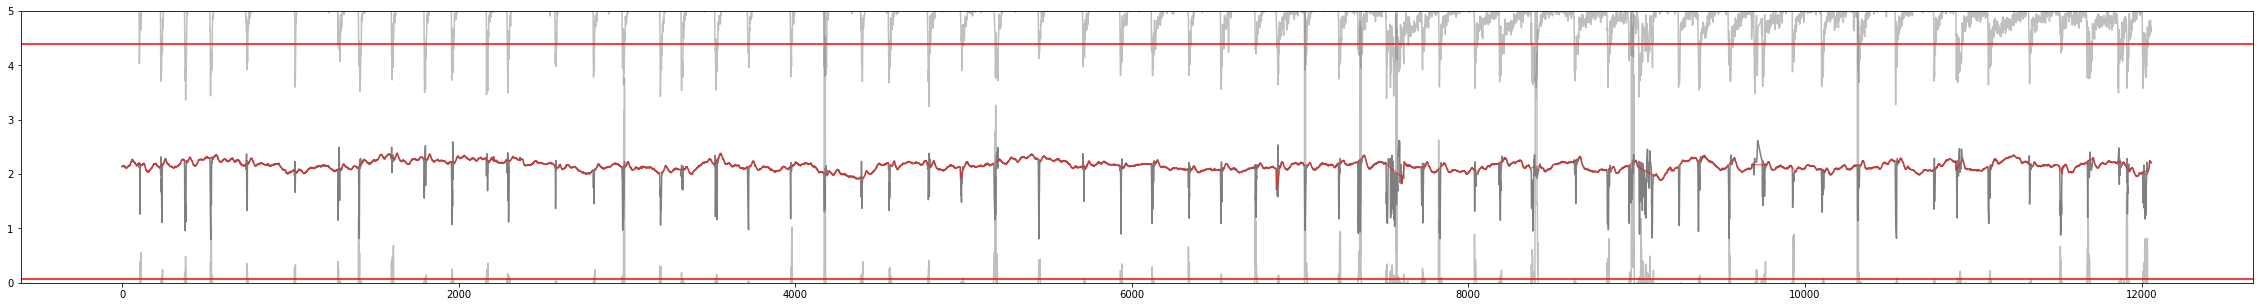

In [143]:
start=5
end=210
excel_thresh_quant=.95
confidence_thresh=.88
islands=5
margin1=5
margin2=5

sub = '015'
r = 1 # 1/2/3 form glob(join)
files = glob(join('/Volumes/psp_data/HealthyControlsMolly/', 'sub-HC_{}*'.format(sub)))
pp = PS.PupilFrame(sub, 'ctrl_molly', 'Baseline', r, directory='/Volumes/psp_data/')

import scipy.io
mat = scipy.io.loadmat(files[r-1])

d1 = pd.DataFrame({'time': mat['eye'][0][0][1][0][1][0],
 'diameter': mat['eye'][0][0][3][0][1][0],
 'confidence': mat['eye'][0][0][2][0][1][0],
 'x': mat['eye'][0][0][4][0][1][0],
 'y': mat['eye'][0][0][5][0][1][0]})
d1.head()

d0 = pd.DataFrame({'time': mat['eye'][0][0][1][0][0][0],
 'diameter': mat['eye'][0][0][3][0][0][0],
 'confidence': mat['eye'][0][0][2][0][0][0],
 'x': mat['eye'][0][0][4][0][0][0],
 'y': mat['eye'][0][0][5][0][0][0]})
d0.head()

l = (d1.confidence < confidence_thresh).mean()
r = (d0.confidence < confidence_thresh).mean()
if l < r:
    d = d1
    print(l, r, 'd1')
elif l > r:
    d = d0
    print(l, r, 'd0')


d=d1


#cut_resample
start=5
end=210
time_zero = d.iloc[0].time     # reference timepoint

d.loc[:, 'time'] =\
    np.round((d.time - time_zero)*1000)
d = d.set_index(pd.to_datetime(d['time'], unit='ms'))

d = d.resample('ms').mean().interpolate('linear')          # upsample to 'ms'
d = d.resample('17ms').mean()                              # downsample to 60Hz
d = d.loc[pd.Timestamp(start, unit='s'):pd.Timestamp(end, unit='s')]


#excel

x_diff = d.x.values - np.roll(d.x.values, 1)
x_diff[0] = 0

y_diff = d.y.values - np.roll(d.y.values, 1)
y_diff[0] = 0
d.loc[:, 'distance'] =\
    np.sqrt(np.square(x_diff) + np.square(y_diff))
d.loc[:, 'velocity'] = PS.derivative(d, 'distance')
d.loc[:, 'acceleration'] = PS.derivative(d, 'velocity')
d.loc[:, 'acceleration'] = (d.loc[:, 'acceleration'] - d.loc[:, 'acceleration'].mean()) / d.loc[:, 'acceleration'].std()


new_cols = {'diameter': 'diameter_mean',
                'confidence': 'confidence_d'}

pp.gp = d.rename(columns=new_cols)

excel_thresh=np.quantile(pp.gp.acceleration.abs().values, excel_thresh_quant)
print(excel_thresh)
pp.discard_interp_(excel_thresh=excel_thresh, confidence_thresh=confidence_thresh,
                     islands=islands, margin2=margin2, margin1=margin1)
f, ax = plt.subplots(figsize=(40, 5))
ax.plot(pp.gp.diameter_mean.values, color='black', alpha=.5)
ax.plot(pp.gp.d_intp.values, color='red', alpha=.5)

ax.plot(pp.gp.confidence_d.values*5, color='grey', alpha=.5)
ax.axhline(confidence_thresh*5, color='red')
print(confidence_thresh)
ax.plot(pp.gp.acceleration.values, color='grey', alpha=.5)

ax.axhline(excel_thresh, color='red')
ax.set_ylim(0, 5)


In [144]:
pp.normalize()
pp.gp =pp.gp.loc[:, ['x', 'y', 'confidence_left', 'diameter_left', 'confidence_right', 'diameter_right', 'distance', 'velocity', 'acceleration', 'notes',
       'diameter_mean', 'confidence_d', 'diameter_blink', 'margin', 'islands',
       'd_intp', 'biz']]
          
print(pp.gp.columns)

pp.gp.to_hdf(join(pp.out_dir, 'Pupil_Preprocessed_SUB-HC-{0}_{1}_{2}.hdf'.
                    format(pp.subject,
                           pp.session,
                           pp.run)), key='Pupil')

Index(['x', 'y', 'confidence_left', 'diameter_left', 'confidence_right',
       'diameter_right', 'distance', 'velocity', 'acceleration', 'notes',
       'diameter_mean', 'confidence_d', 'diameter_blink', 'margin', 'islands',
       'd_intp', 'biz'],
      dtype='object')


In [46]:
def filter(sig, highpass=.01, lowpass=6, sample_rate=60):
        '''
        Apply 3rd-order Butterworth bandpass filter.
        '''
        hp_cof_sample = highpass / (sample_rate / 2)
        bhp, ahp = signal.butter(3, hp_cof_sample, btype='high')
        sig = signal.filtfilt(bhp, ahp, sig)
        lp_cof_sample = lowpass / (sample_rate / 2)                             # low pass
        blp, alp = signal.butter(3, lp_cof_sample)
        sig = signal.filtfilt(blp, alp,
                                                sig)          # band pass
        return sig


In [146]:
pp.out_dir

'/Volumes/psp_data/Pupil_Preprocessed_2022-12-19'

### IPS subjects Gulbi

In [3]:
from PSPupil import dataset

In [4]:
dataset.ips_runs

{'01': ['000_DBS_OFF', '001_DBS_OFF', '003_DBS_OFF'],
 '02': ['006_C', '007_C', '008_C'],
 '03': ['000_A', '001_A', '002_A'],
 '04': ['006_C', '007_C', '008_C'],
 '05': ['000_A', '001_A', '002_A'],
 '06': ['003_B', '004_B', '005_B'],
 '07': ['007_C', '008_C', '009_C'],
 '08': ['000', '001', '002'],
 '09': ['006', '007', '008'],
 '10': ['000', '001', '002'],
 '11': ['003', '004', '005'],
 '12': ['006', '007', '008']}

01 000_DBS_OFF
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_01_27_STE_P01/000_DBS_OFF/pupil_data']
0.9


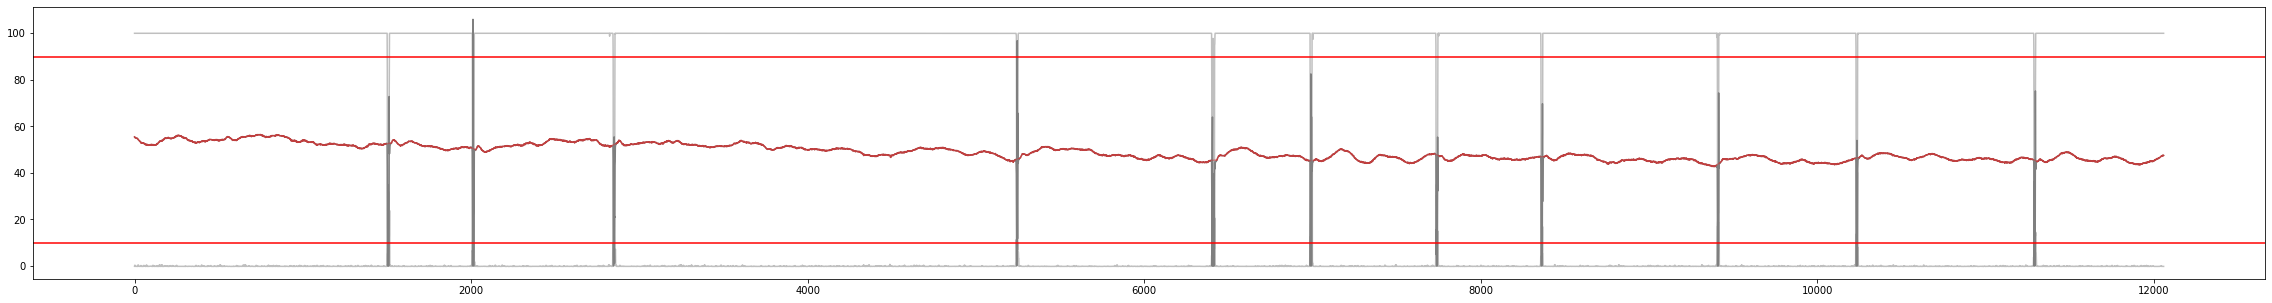

01 001_DBS_OFF
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_01_27_STE_P01/001_DBS_OFF/pupil_data']
0.9


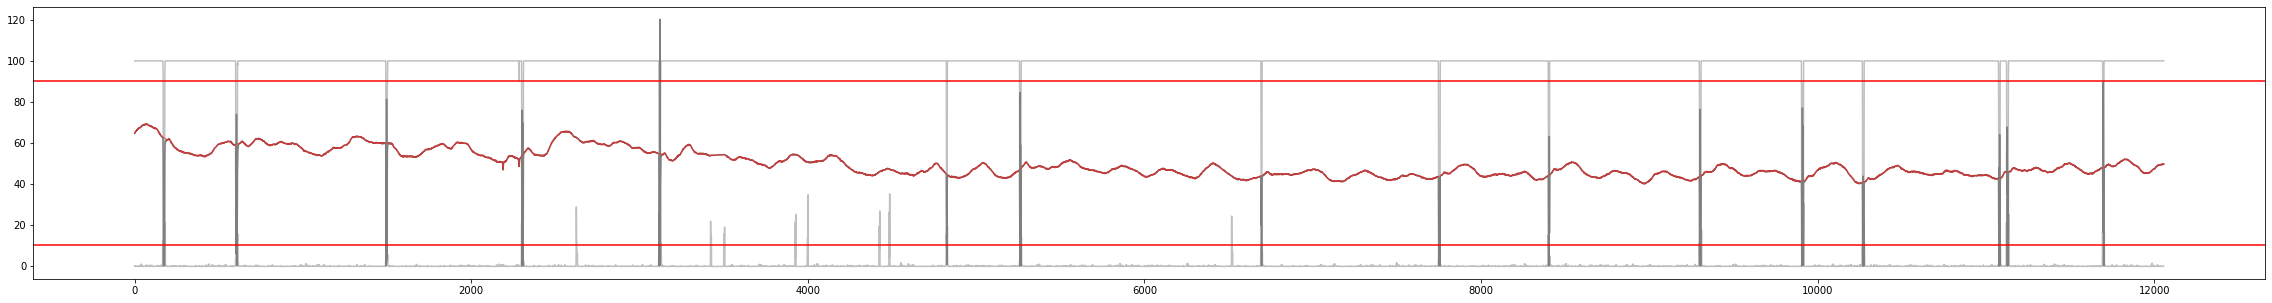

01 003_DBS_OFF
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_01_27_STE_P01/003_DBS_OFF/pupil_data']
0.9


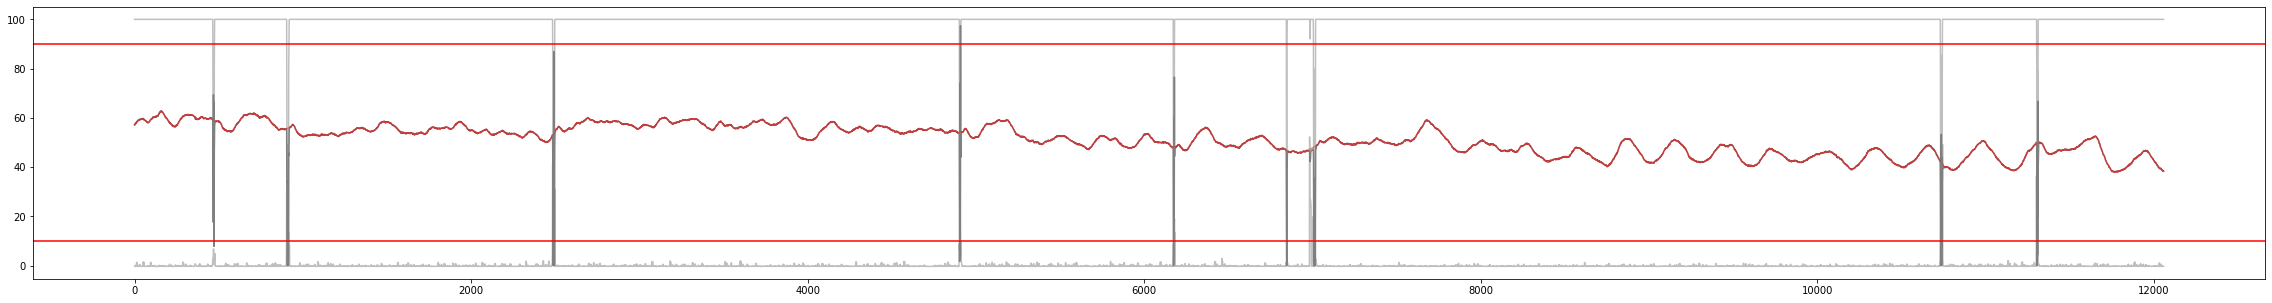

02 006_C
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_02_14_DRP_P02/006_C/pupil_data']
0.9


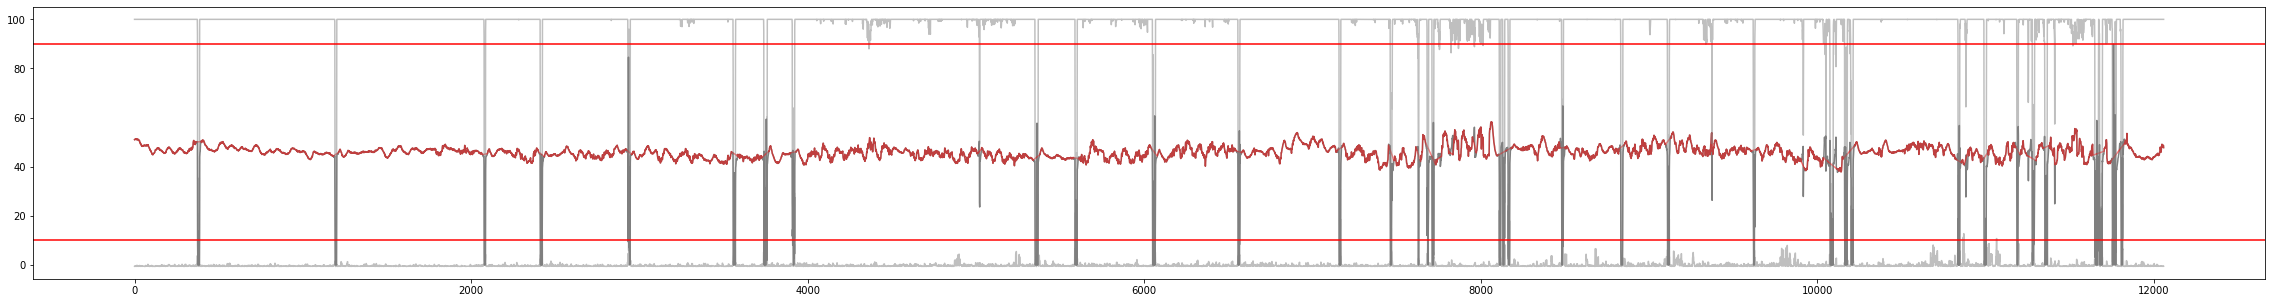

02 007_C
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_02_14_DRP_P02/007_C/pupil_data']
0.9


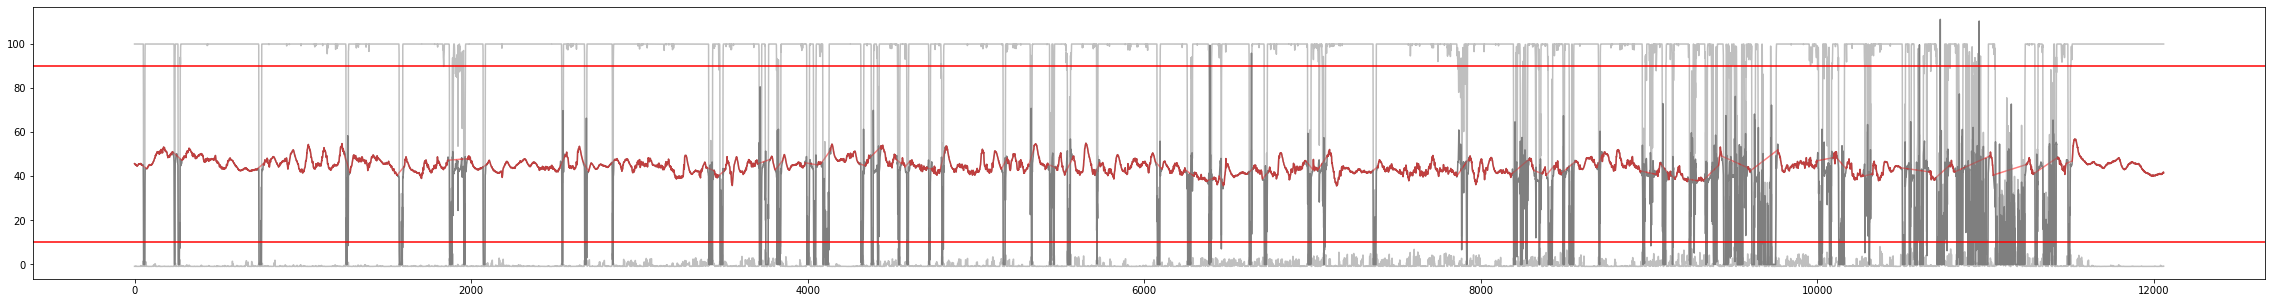

02 008_C
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_02_14_DRP_P02/008_C/pupil_data']
0.9


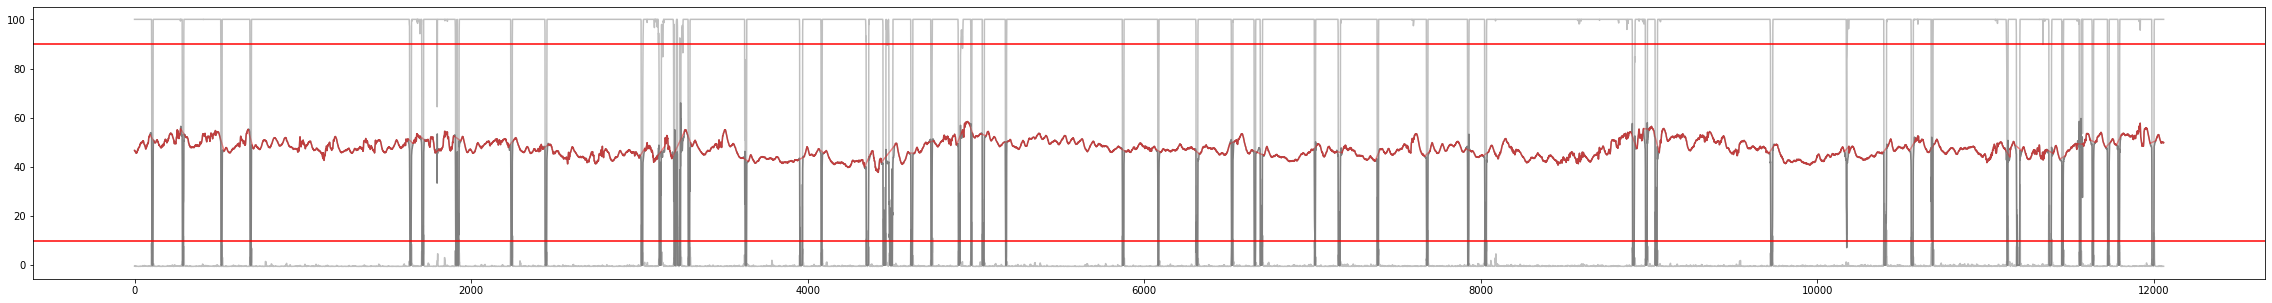

03 000_A
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_02_28_BRD_P03/000_A/pupil_data']
0.9


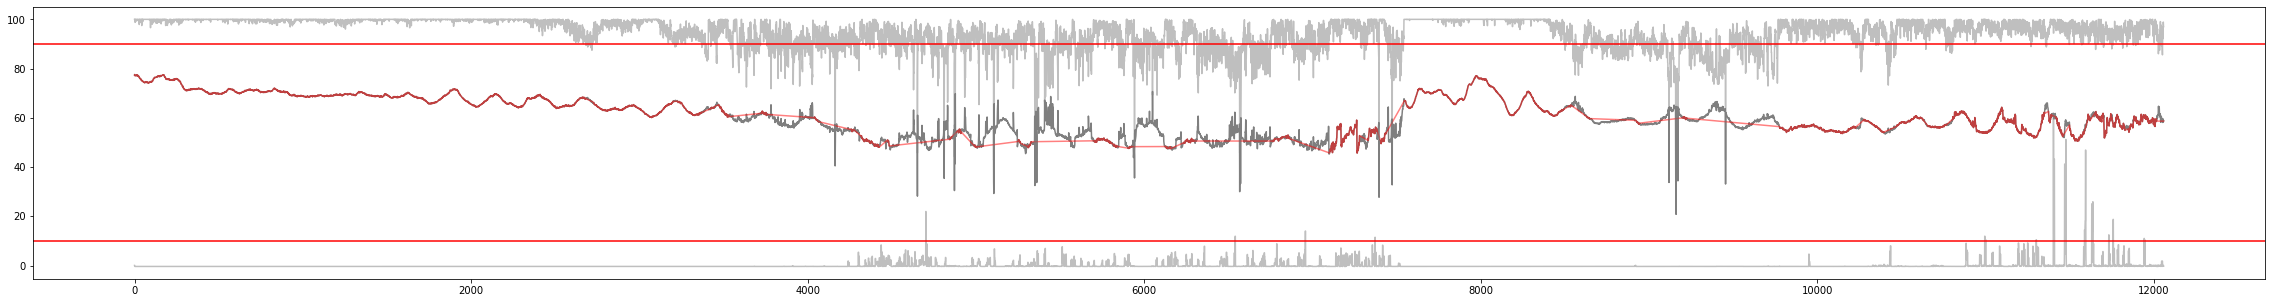

03 001_A
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_02_28_BRD_P03/001_A/pupil_data']
0.9


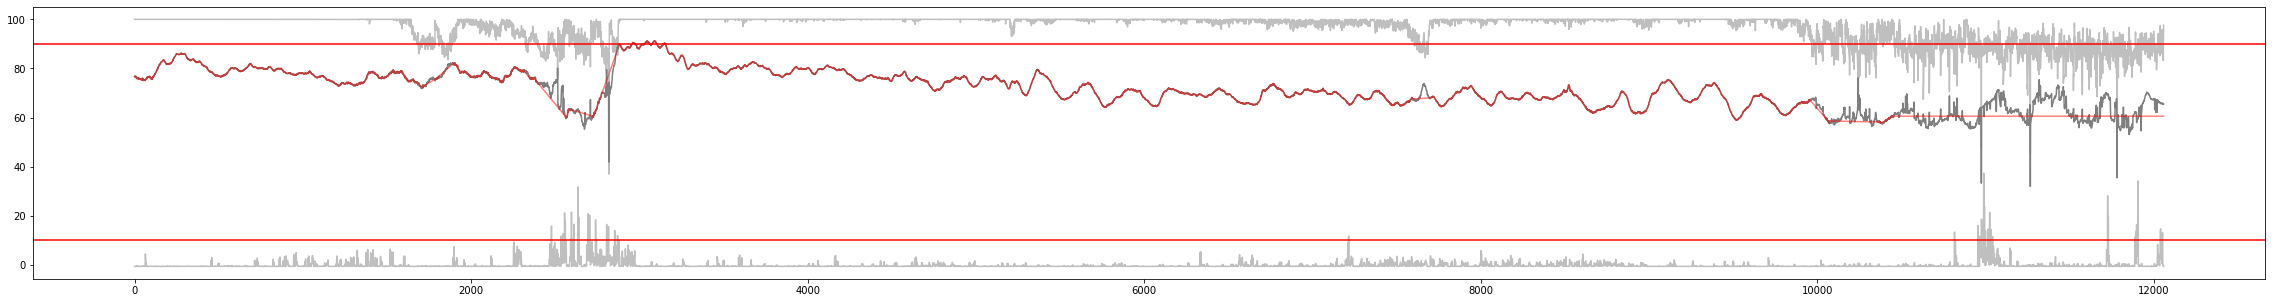

03 002_A
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_02_28_BRD_P03/002_A/pupil_data']
0.9


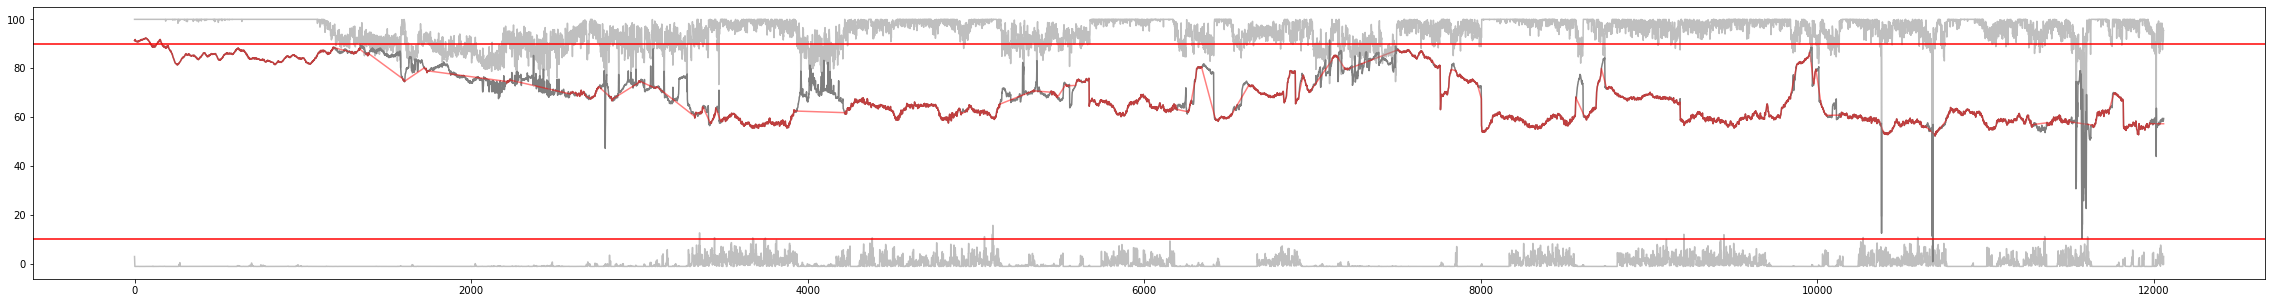

04 006_C
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_03_29_WSA_P04/006_C/pupil_data']
0.9


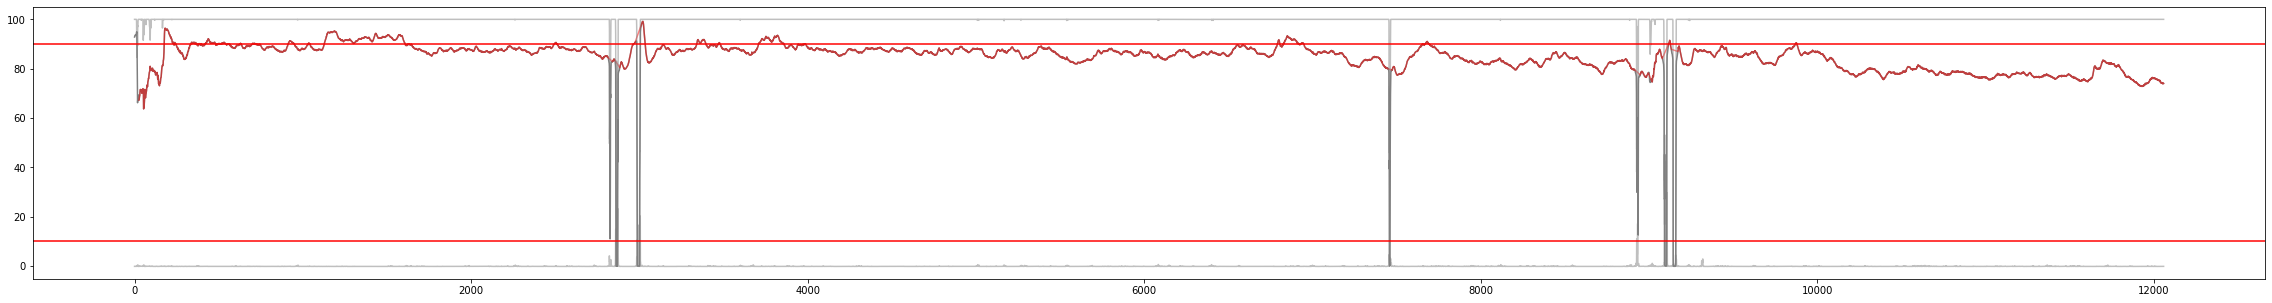

04 007_C
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_03_29_WSA_P04/007_C/pupil_data']
0.9


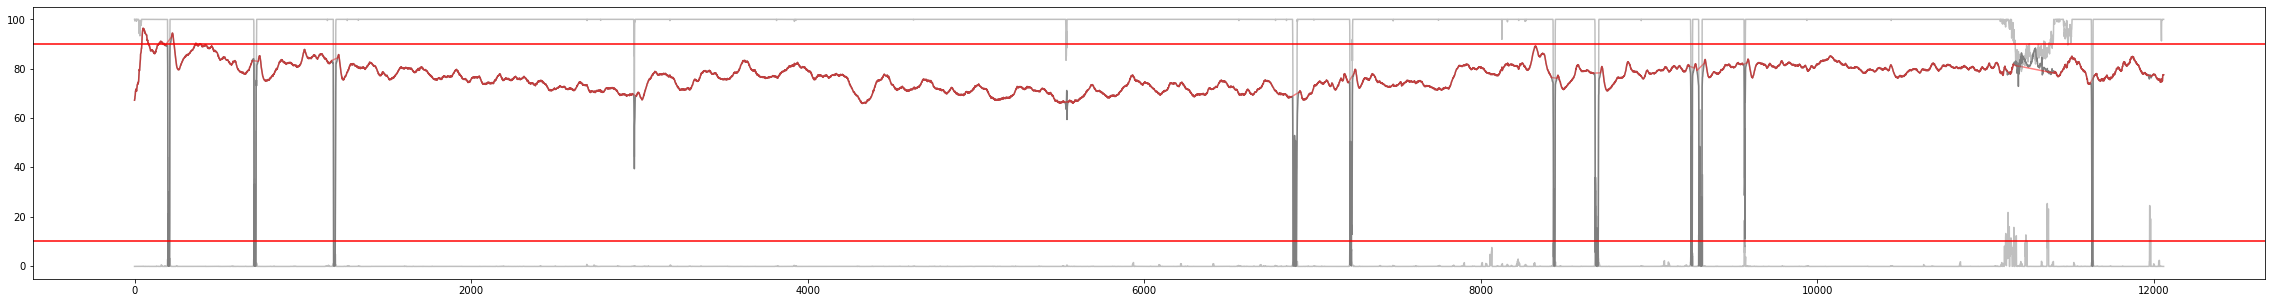

04 008_C
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_03_29_WSA_P04/008_C/pupil_data']
0.9


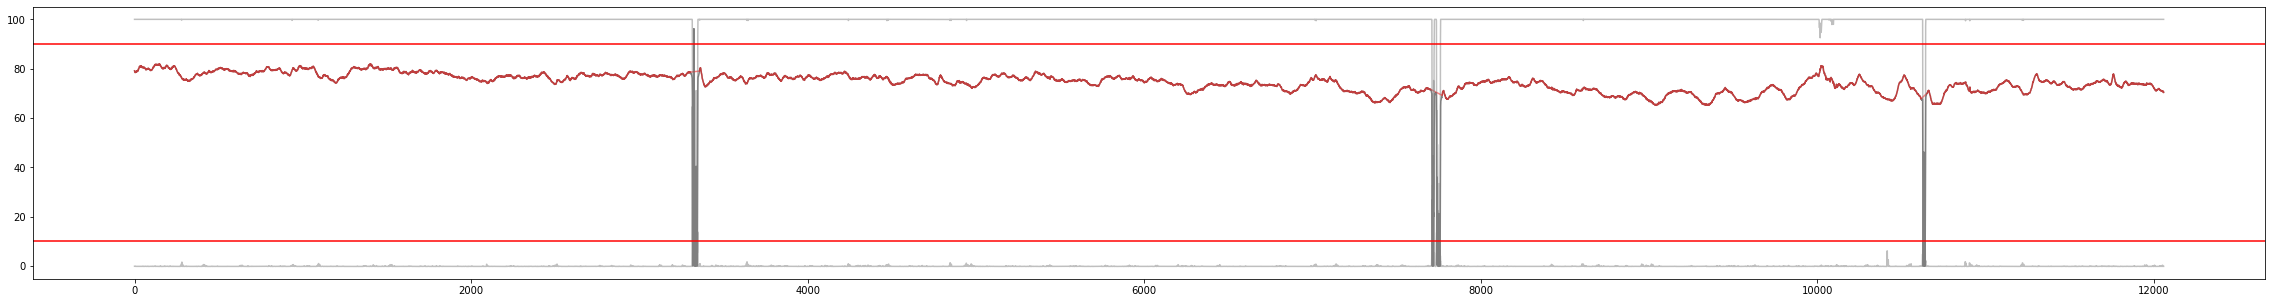

05 000_A
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_04_11_BOH_P05/000_A/pupil_data']
0.9


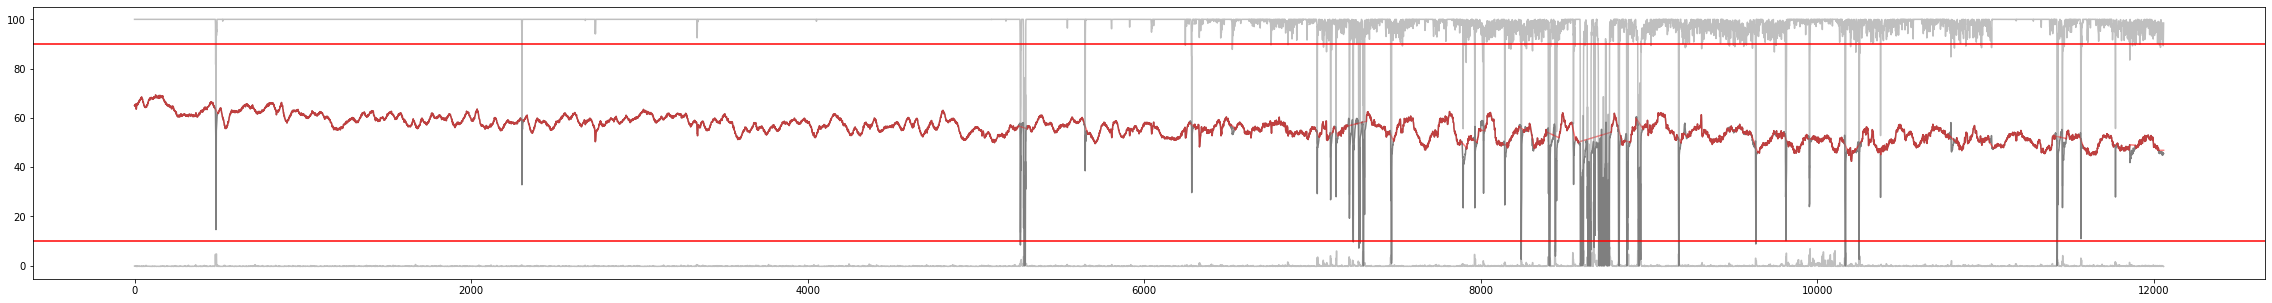

05 001_A
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_04_11_BOH_P05/001_A/pupil_data']
0.9


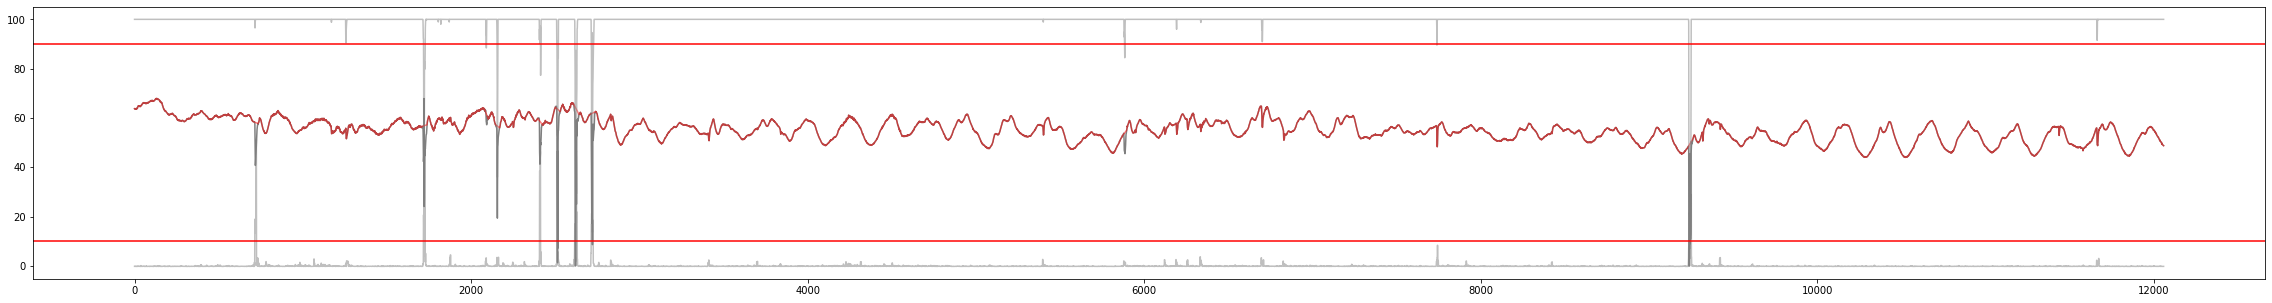

05 002_A
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_04_11_BOH_P05/002_A/pupil_data']
0.9


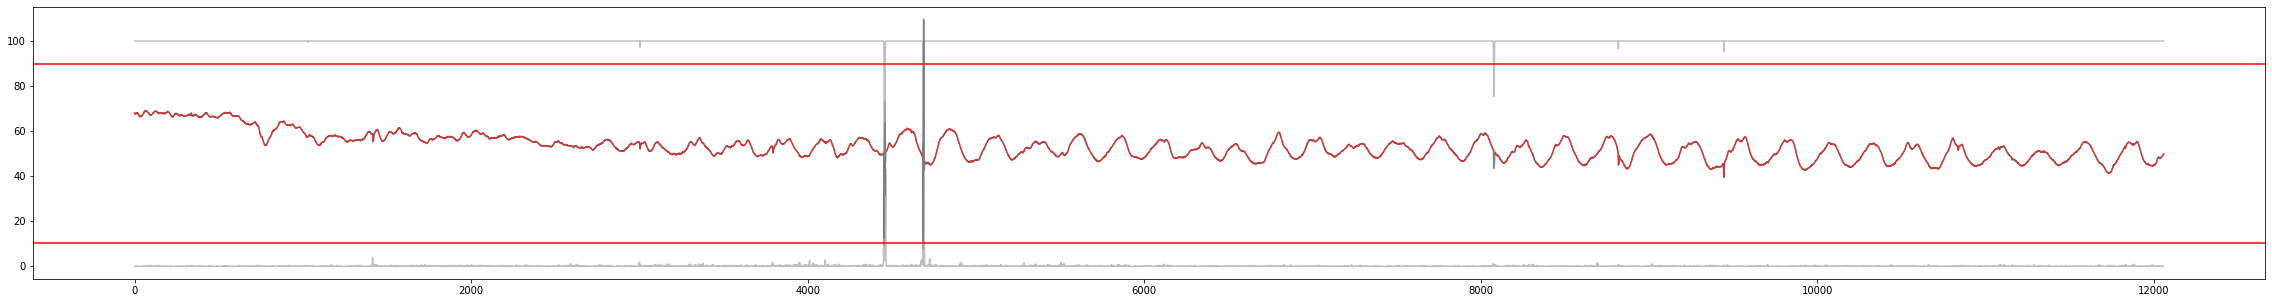

06 003_B
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_04_12_KRE_P06/003_B/pupil_data']
0.9


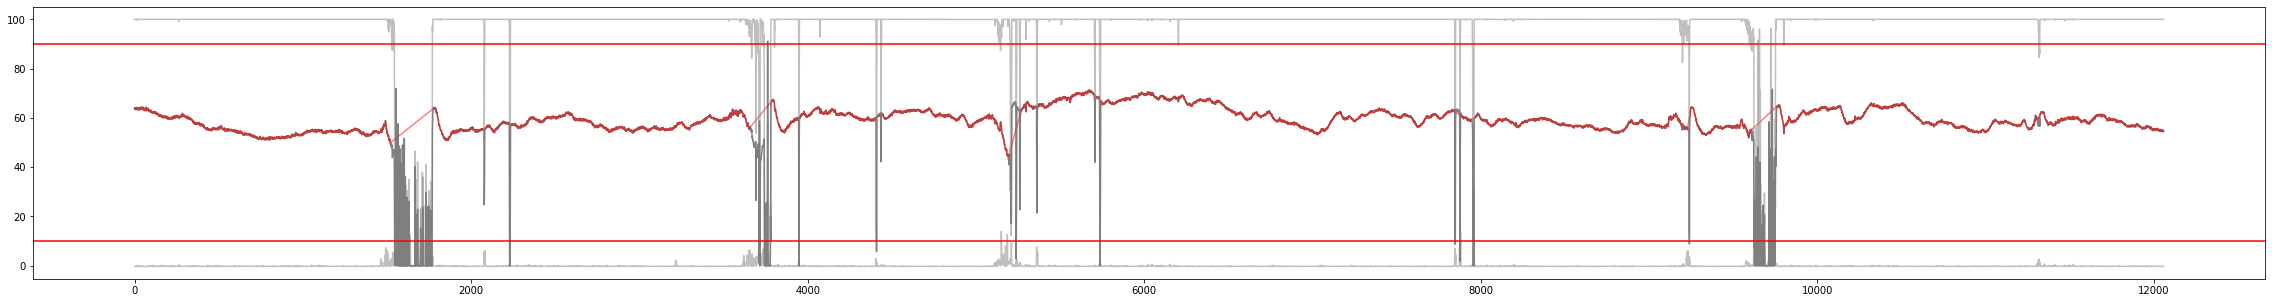

06 004_B
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_04_12_KRE_P06/004_B/pupil_data']
0.9


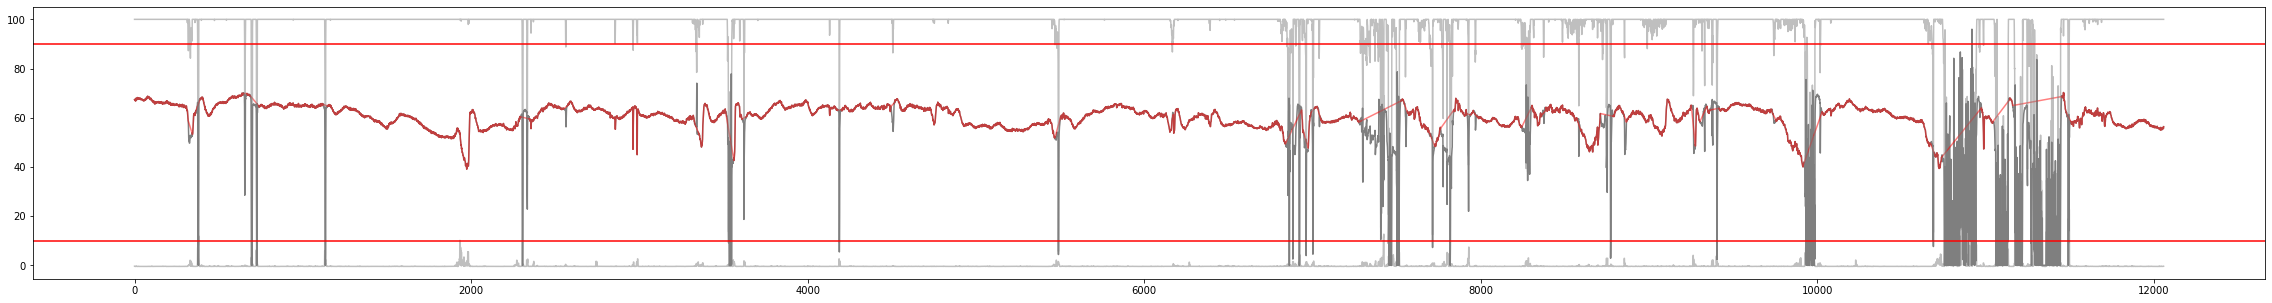

06 005_B
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_04_12_KRE_P06/005_B/pupil_data']
0.9


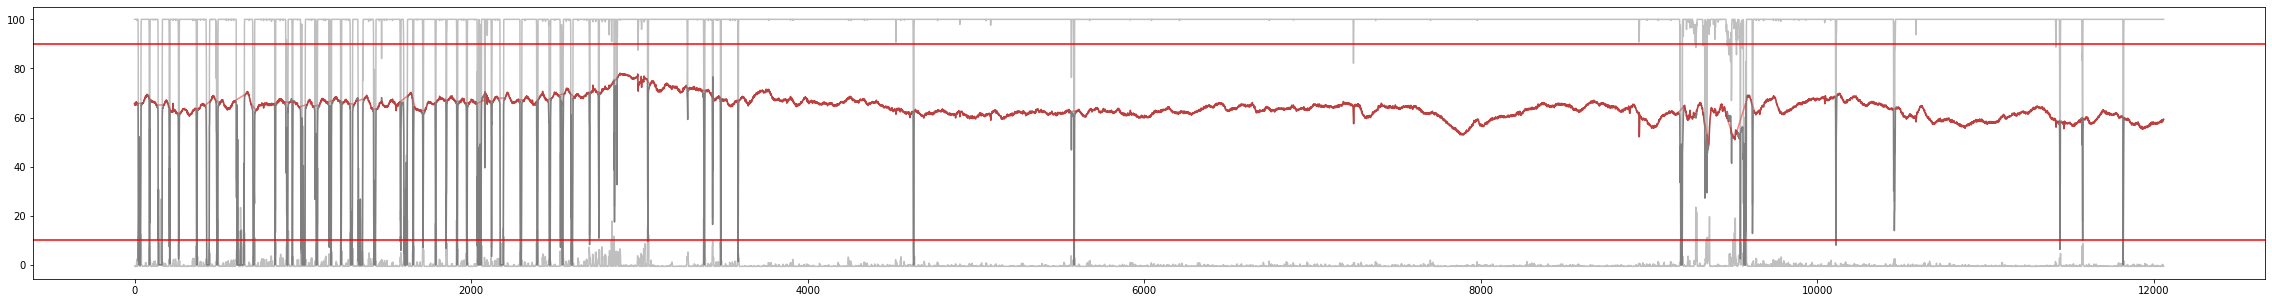

07 007_C
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_04_25_OPP_P07/007_C/pupil_data']
0.9


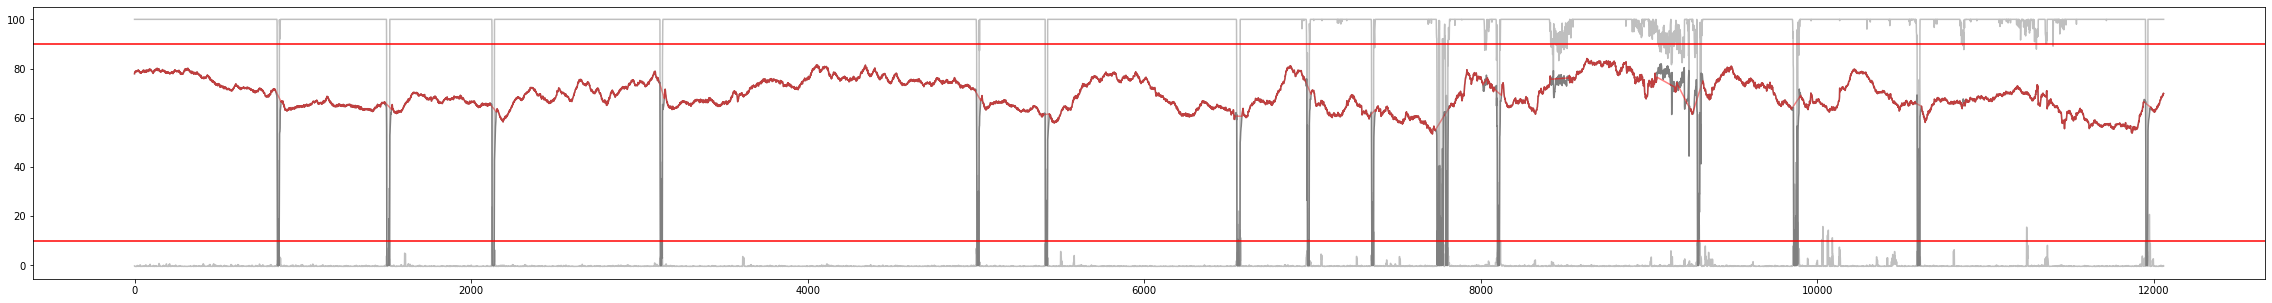

07 008_C
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_04_25_OPP_P07/008_C/pupil_data']
0.9


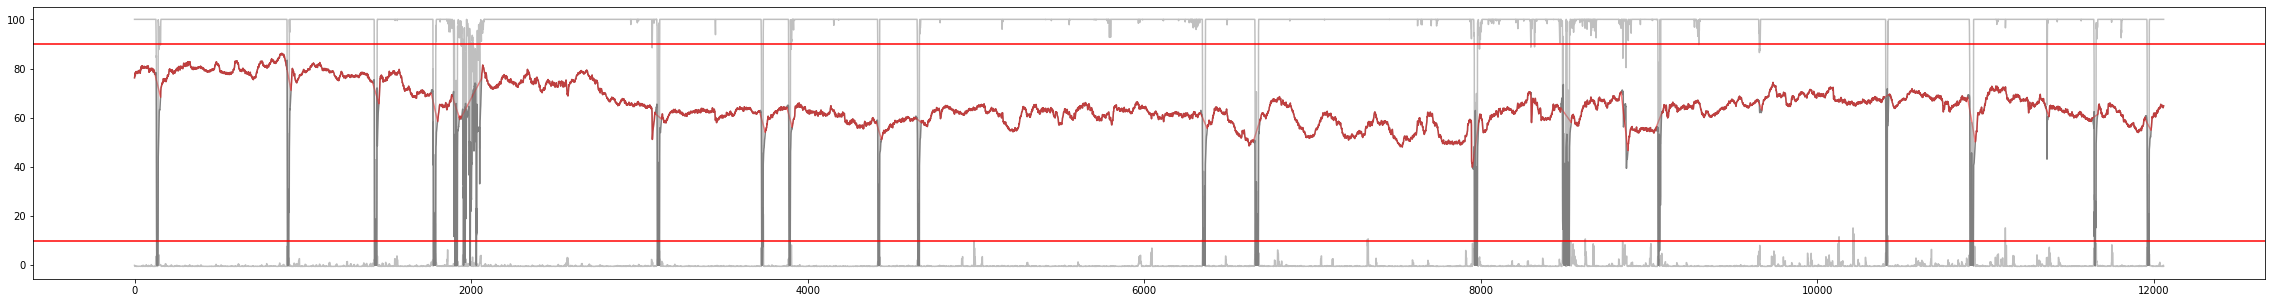

07 009_C
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_04_25_OPP_P07/009_C/pupil_data']
0.9


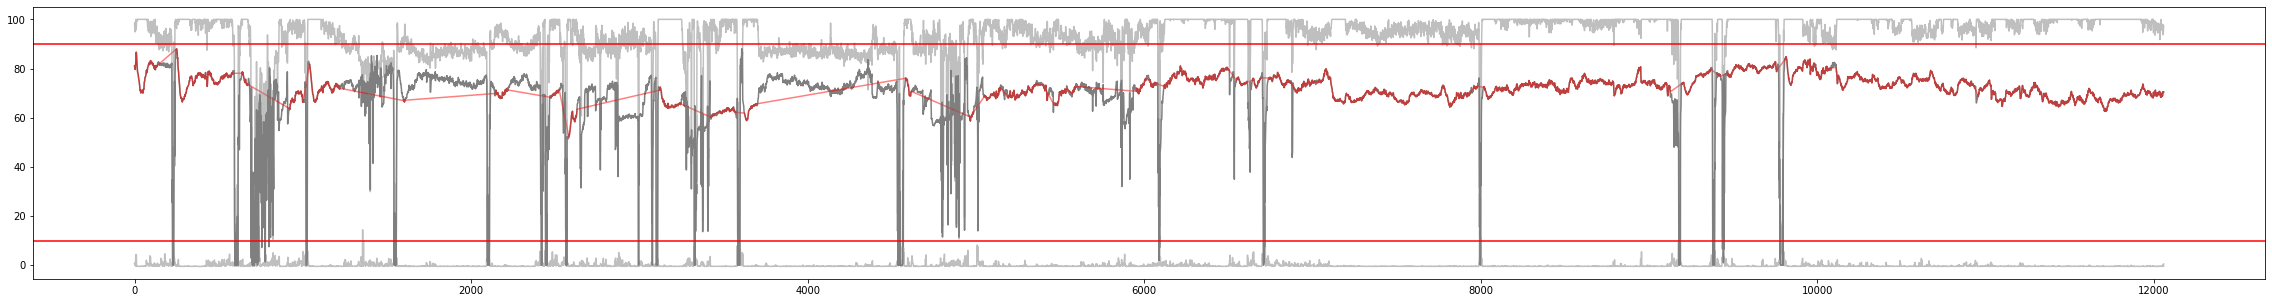

08 000
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_08_22_LEM_P08/000/pupil_data']
0.9


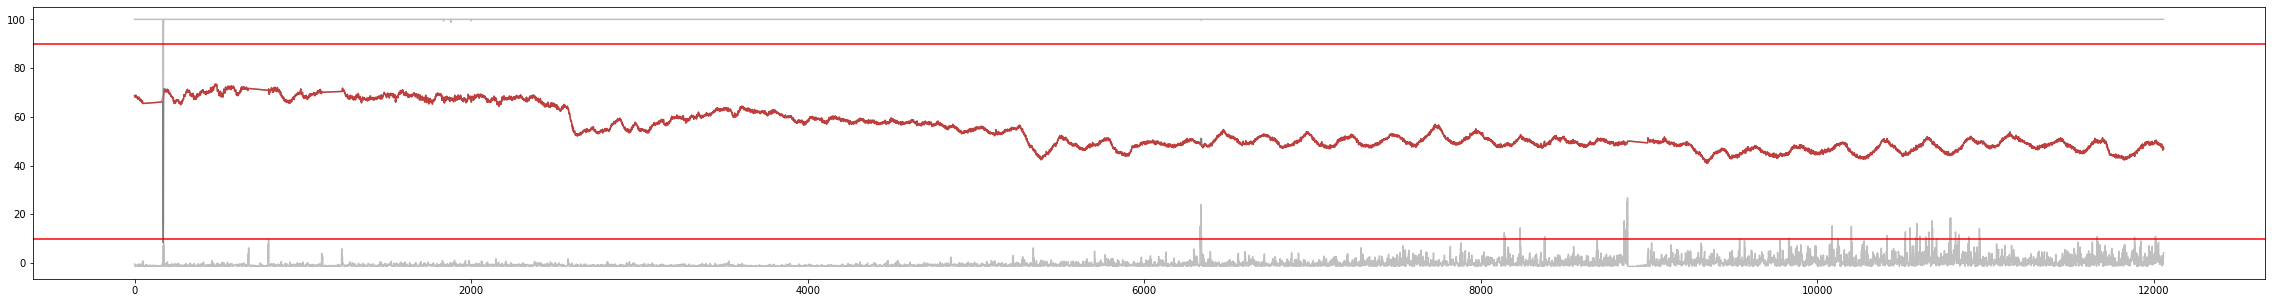

08 001
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_08_22_LEM_P08/001/pupil_data']
0.9


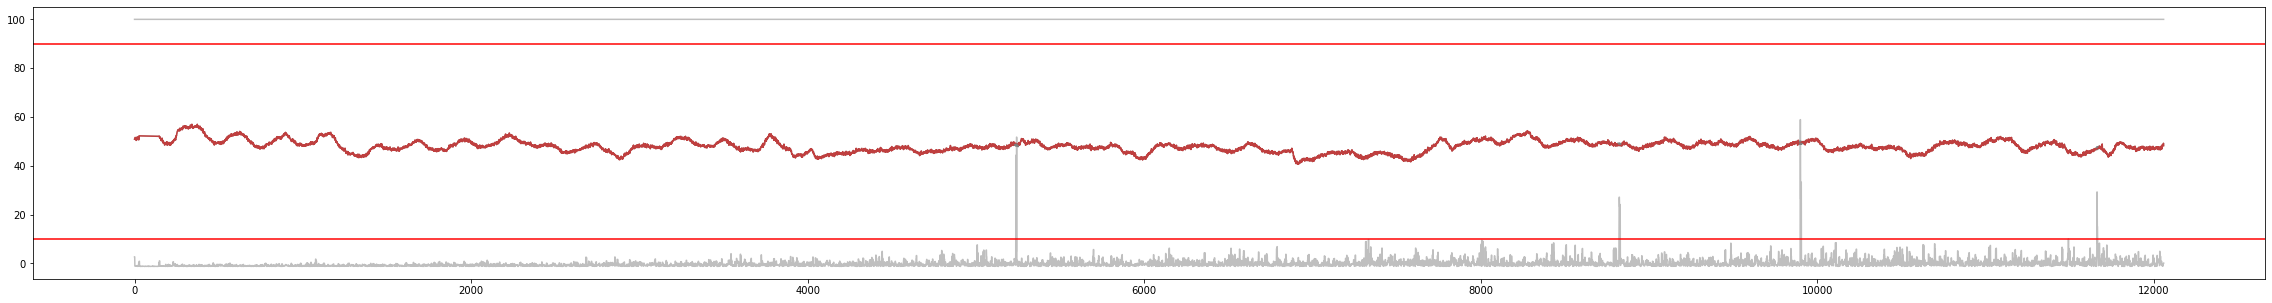

08 002
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_08_22_LEM_P08/002/pupil_data']
0.9


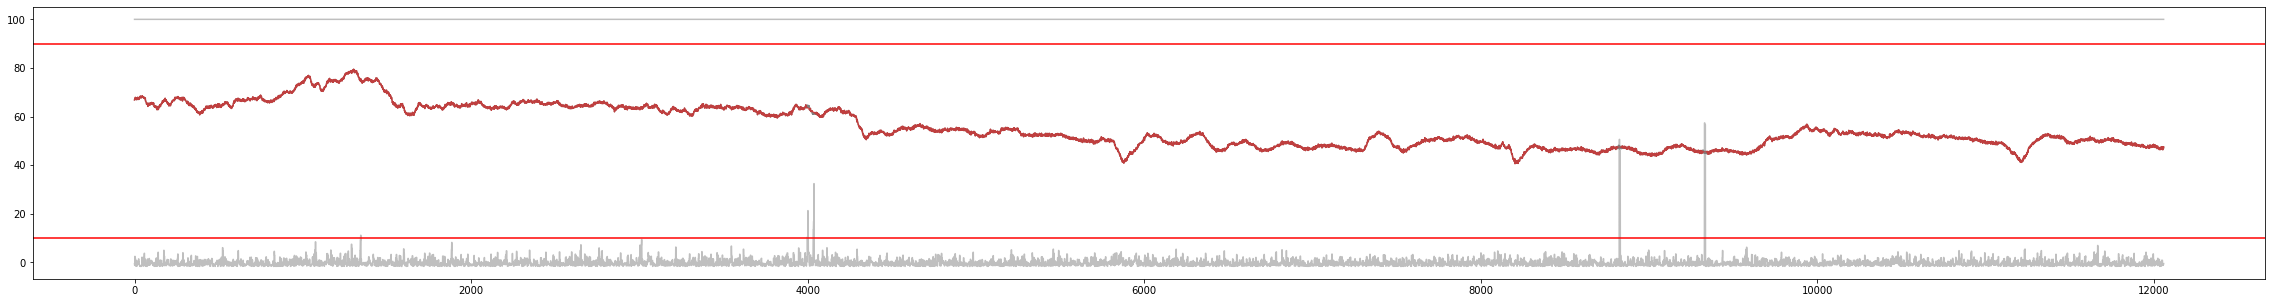

09 006
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_08_29_TAJ_P09/006/pupil_data']
0.9


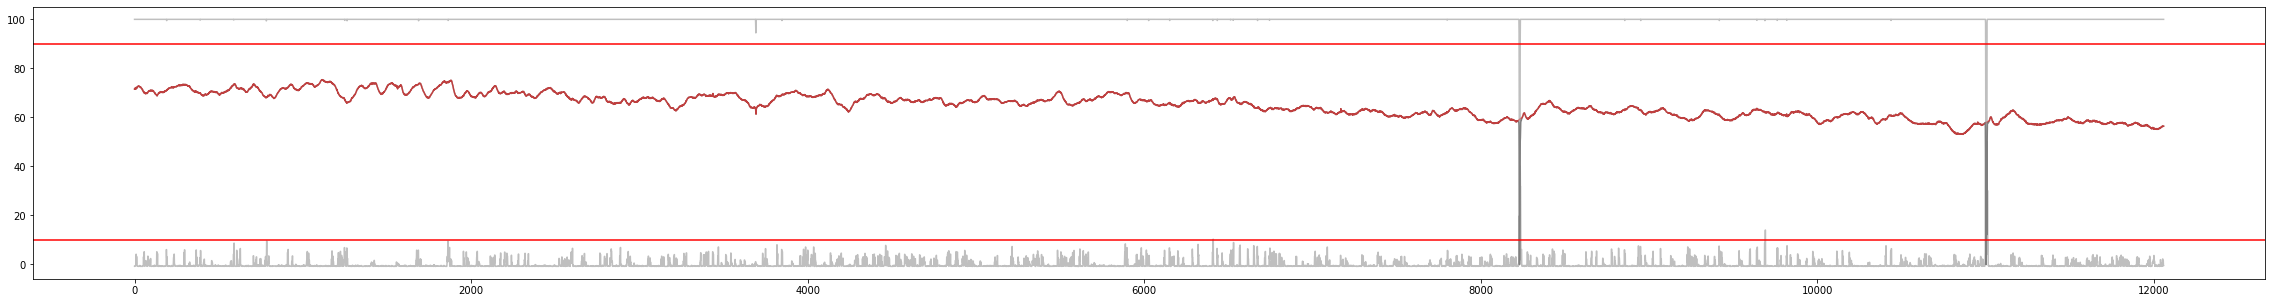

09 007
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_08_29_TAJ_P09/007/pupil_data']
0.9


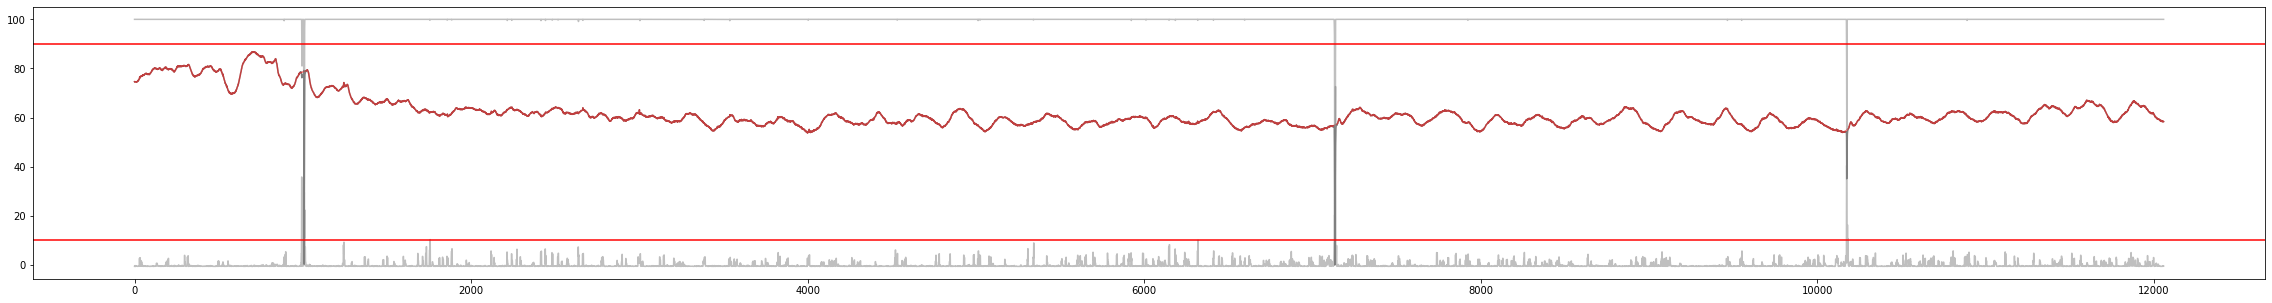

09 008
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_08_29_TAJ_P09/008/pupil_data']
0.9


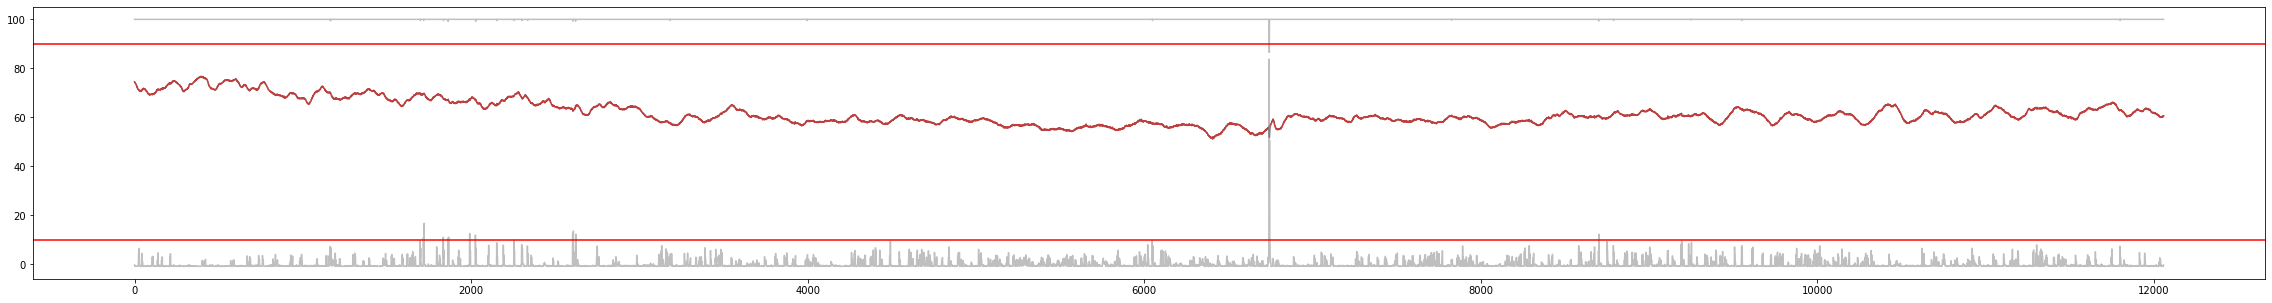

10 000
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_09_12_BRH_P10/000/pupil_data']
0.9


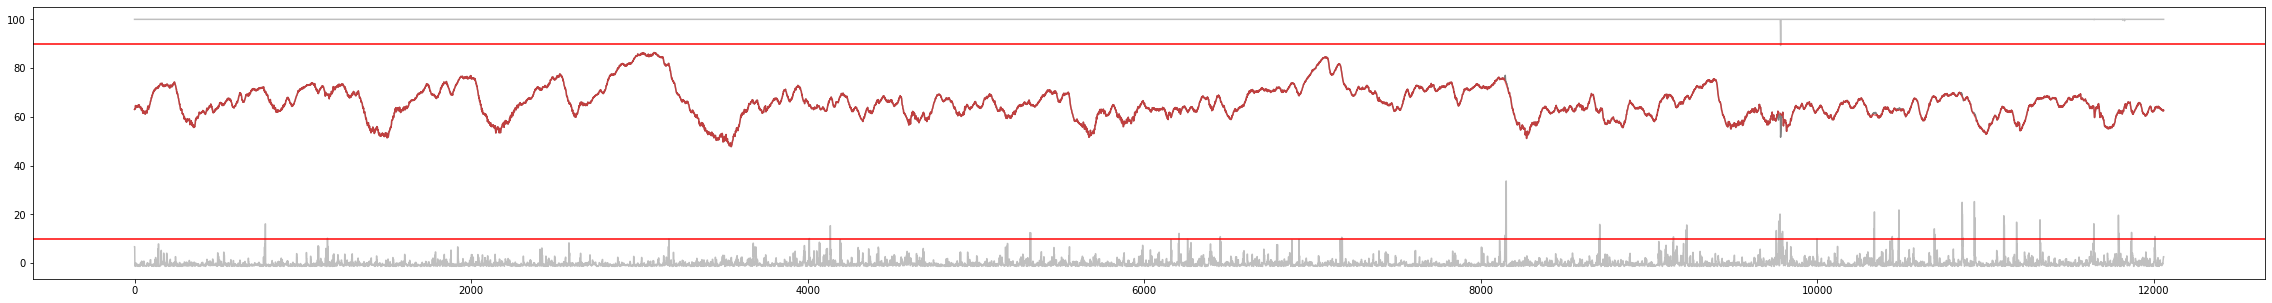

10 001
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_09_12_BRH_P10/001/pupil_data']
0.9


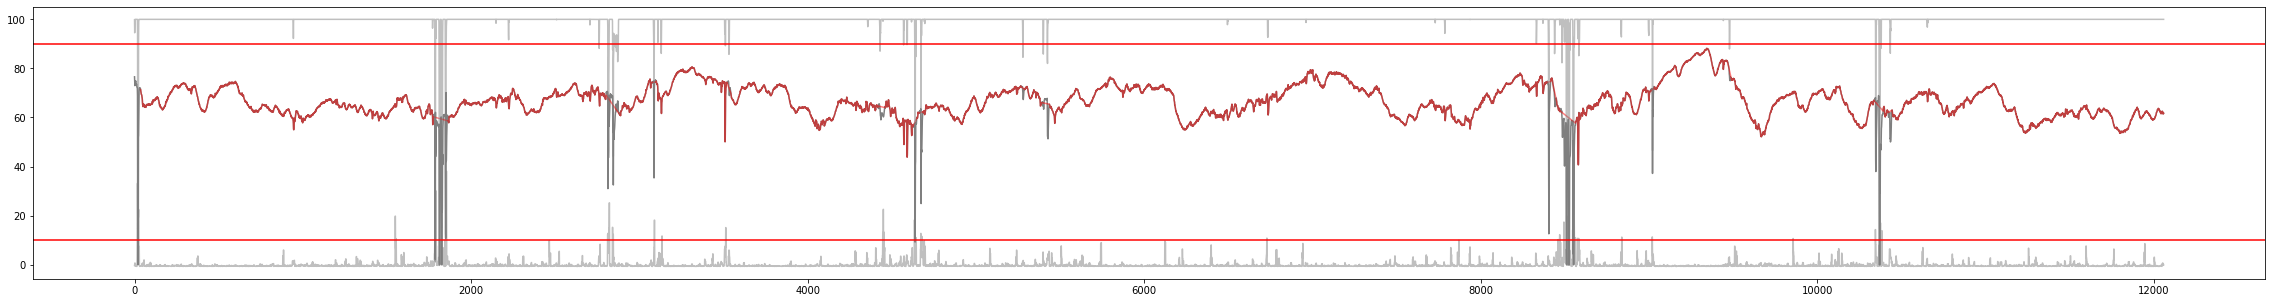

10 002
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_09_12_BRH_P10/002/pupil_data']
0.9


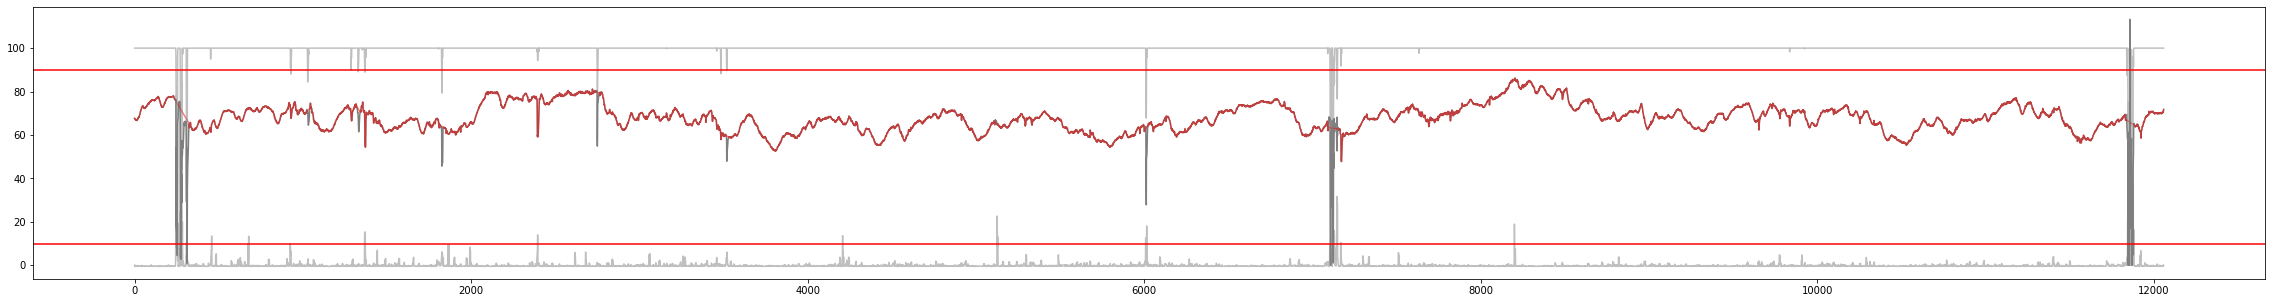

11 003
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_10_17_LEH_P11/003/pupil_data']
Confidence equal in both eyes
0.9


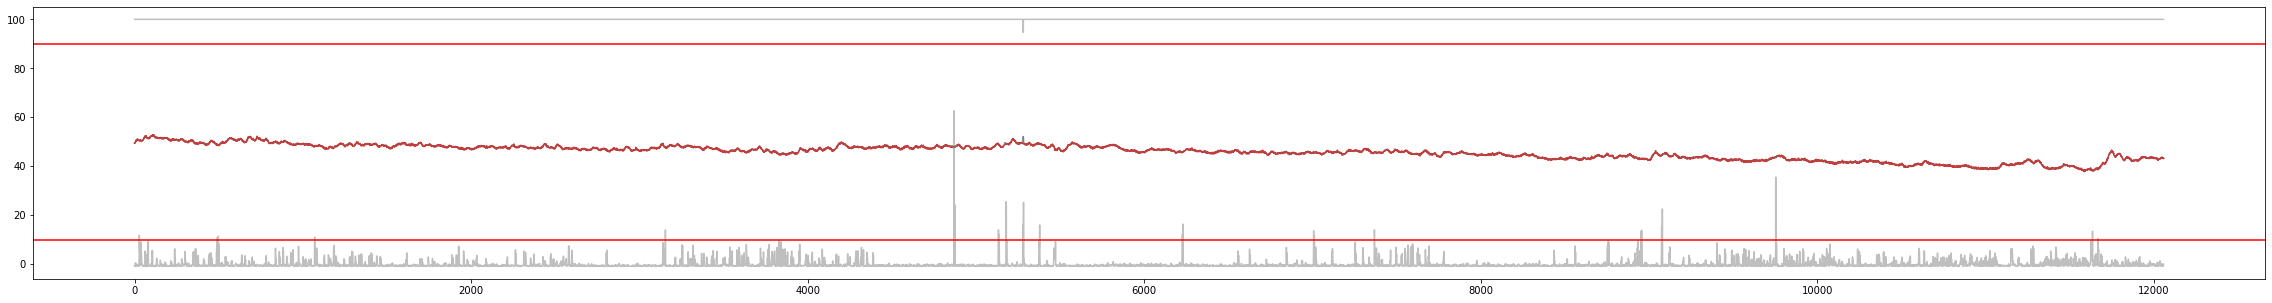

11 004
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_10_17_LEH_P11/004/pupil_data']
0.9


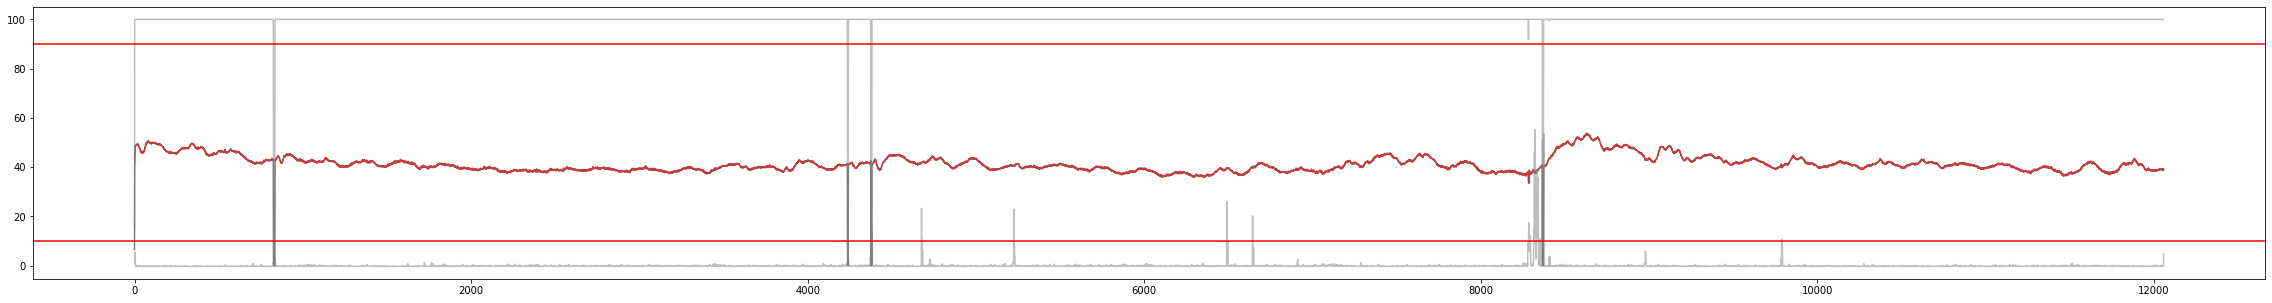

11 005
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_10_17_LEH_P11/005/pupil_data']
0.9


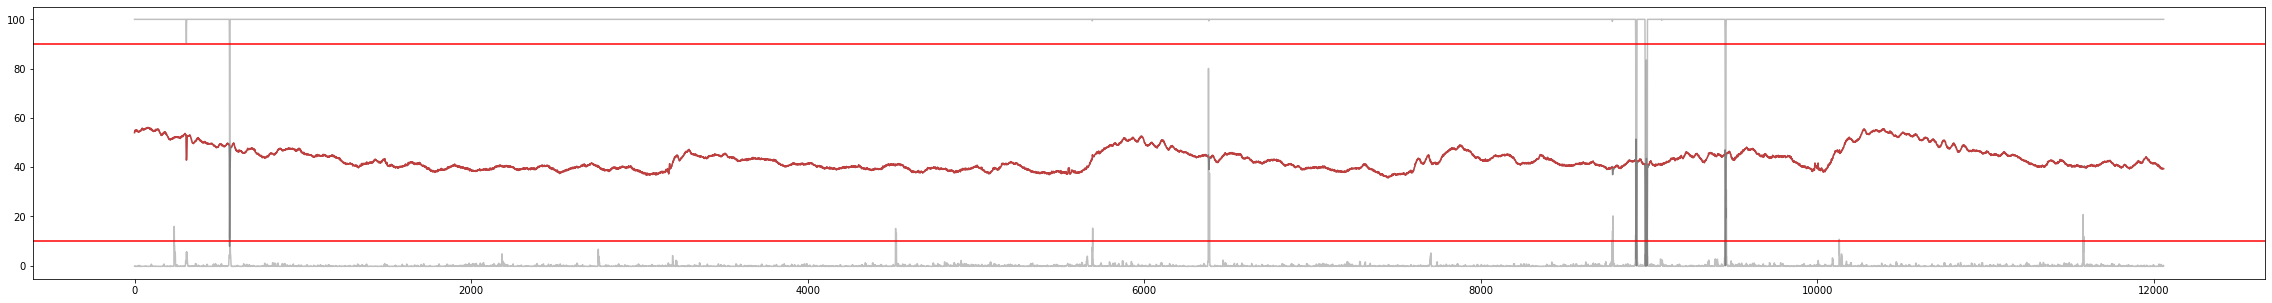

12 006
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_11_22_THO_P12/006/pupil_data']
0.9


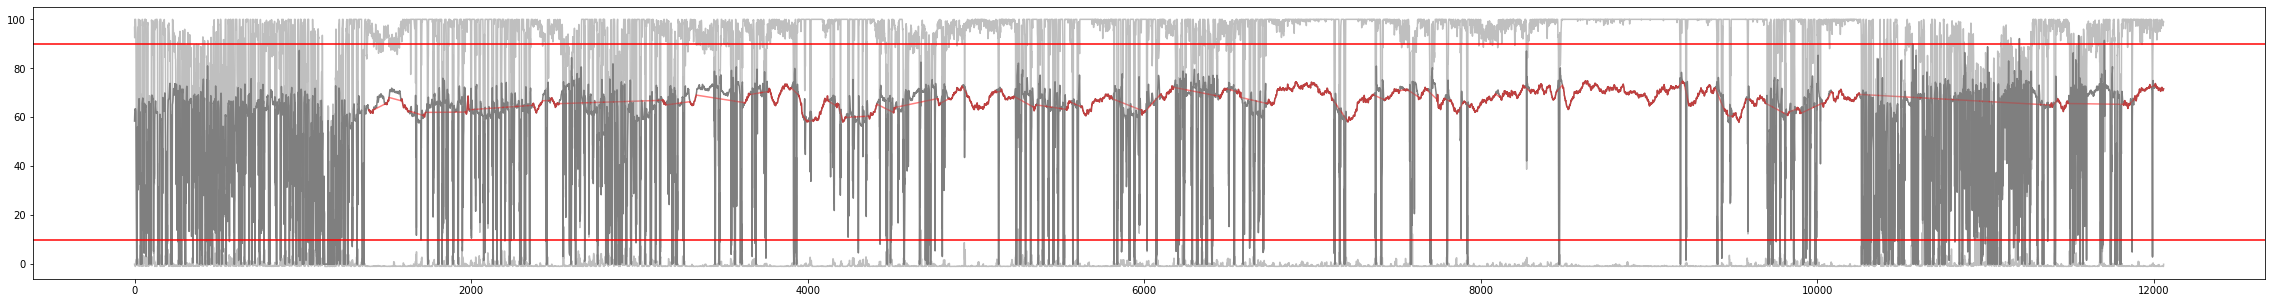

12 007
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_11_22_THO_P12/007/pupil_data']
0.9


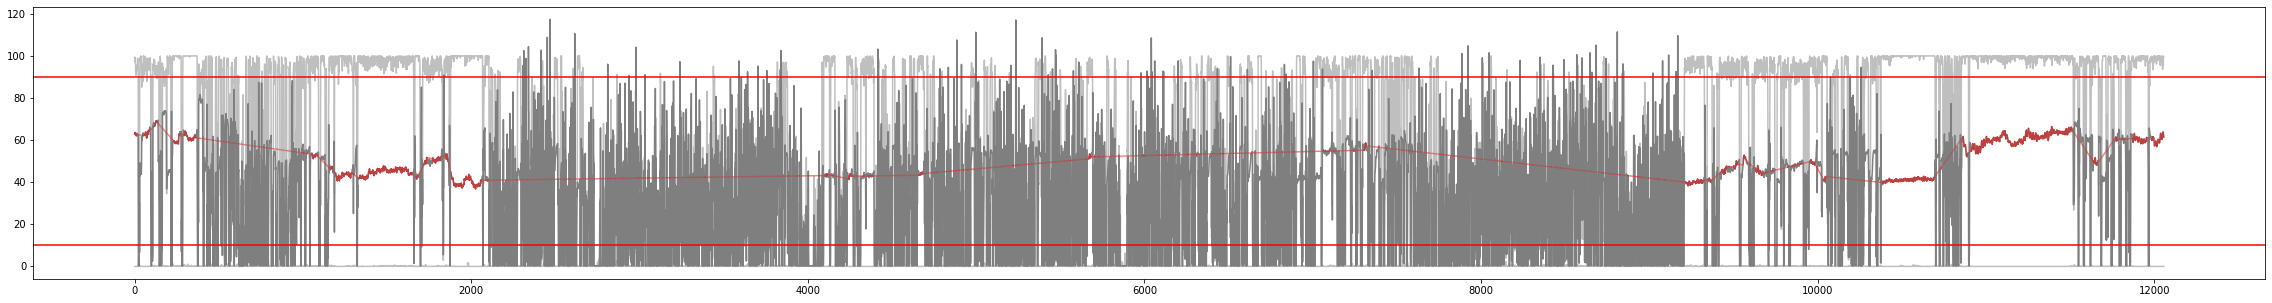

12 008
['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_11_22_THO_P12/008/pupil_data']
0.9


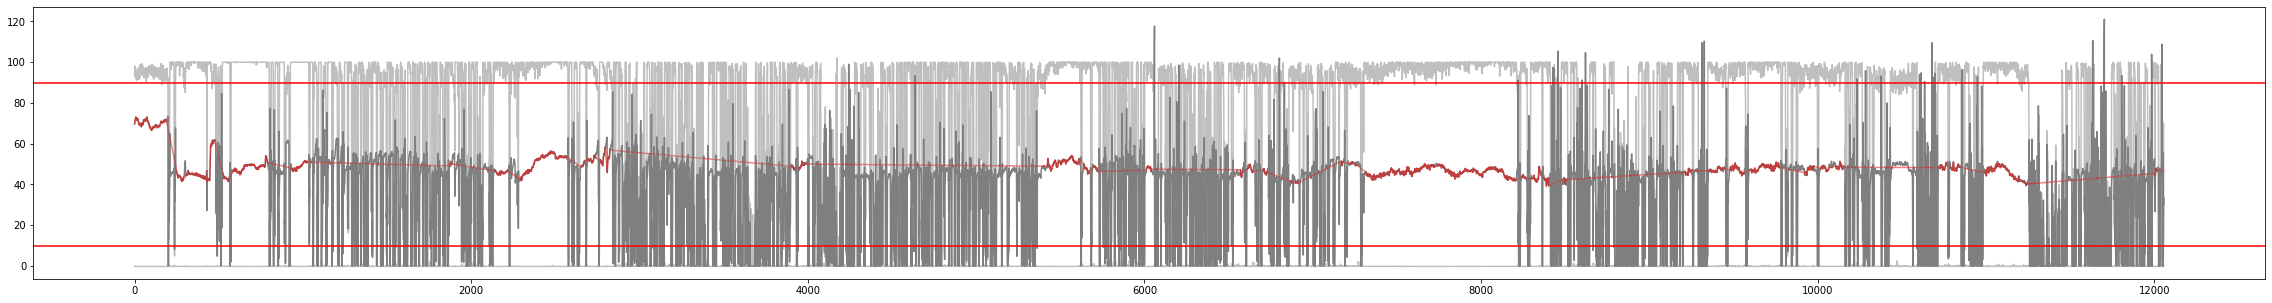

In [78]:
for sub, r in dataset.ips_runs.items():
    for run in r:
        print(sub, run)
        p = PS.PupilFrame(directory = '/Volumes/psp_data', subject = sub, group='IPS', session = 'STIMOFF', run = run)
        path = glob(join('/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017*P{}'.format(sub), run, 'pupil_data'))
        print(path)
        with open(path[0], 'rb') as f:
            file = pickle.load(f, encoding="latin-1")
        df = pd.DataFrame(file['pupil_positions'])
        p.pupil['left'] = df.loc[df.id == 0].drop(['norm_pos',
                                                      'ellipse',
                                                      'method'], axis=1)
        p.pupil['right'] = df.loc[df.id == 1].drop(['norm_pos',
                                                       'ellipse',
                                                       'method'], axis=1)
        p.pupil['gaze'] = pd.DataFrame(file['gaze_positions'])
        p.cut_resample()
        p.excel()
        excel_thresh=10
        confidence_thresh=.9
        islands=10
        margin1=10
        margin2=10

        p.discard_interp(excel_thresh=excel_thresh, confidence_thresh=confidence_thresh,
                             islands=islands, margin2=margin2, margin1=margin1)

        f, ax = plt.subplots(figsize=(40, 5))
        ax.plot(p.gp.diameter_mean.values, color='black', alpha=.5)
        ax.plot(p.gp.d_intp.values, color='red', alpha=.5)

        ax.plot(p.gp.confidence_d.values*100, color='grey', alpha=.5)
        ax.axhline(confidence_thresh*100, color='red')
        print(confidence_thresh)

        ax.plot(p.gp.acceleration.values*2, color='grey', alpha=.5)
        ax.axhline(excel_thresh, color='red')
        plt.show()
        p.normalize()
        p.save()


#### Einzlene subjects optimieren
-> 3, 7, 10, 12

In [107]:
sub = '10'
run = 2

run = dataset.ips_runs[sub][run]
p = PS.PupilFrame(directory = '/Volumes/psp_data', subject = sub, group='IPS', session = 'STIMOFF', run = run)
path = glob(join('/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017*P{}'.format(sub), run, 'pupil_data'))
print(path)
with open(path[0], 'rb') as f:
    file = pickle.load(f, encoding="latin-1")
df = pd.DataFrame(file['pupil_positions'])
p.pupil['left'] = df.loc[df.id == 0].drop(['norm_pos',
                                              'ellipse',
                                              'method'], axis=1)
p.pupil['right'] = df.loc[df.id == 1].drop(['norm_pos',
                                               'ellipse',
                                               'method'], axis=1)
p.pupil['gaze'] = pd.DataFrame(file['gaze_positions'])
p.cut_resample()
p.excel()

['/Volumes/psp_data/Eyetracking_PD_STN_SNr_Gulbi/IPS/2017_09_12_BRH_P10/002/pupil_data']


0.99


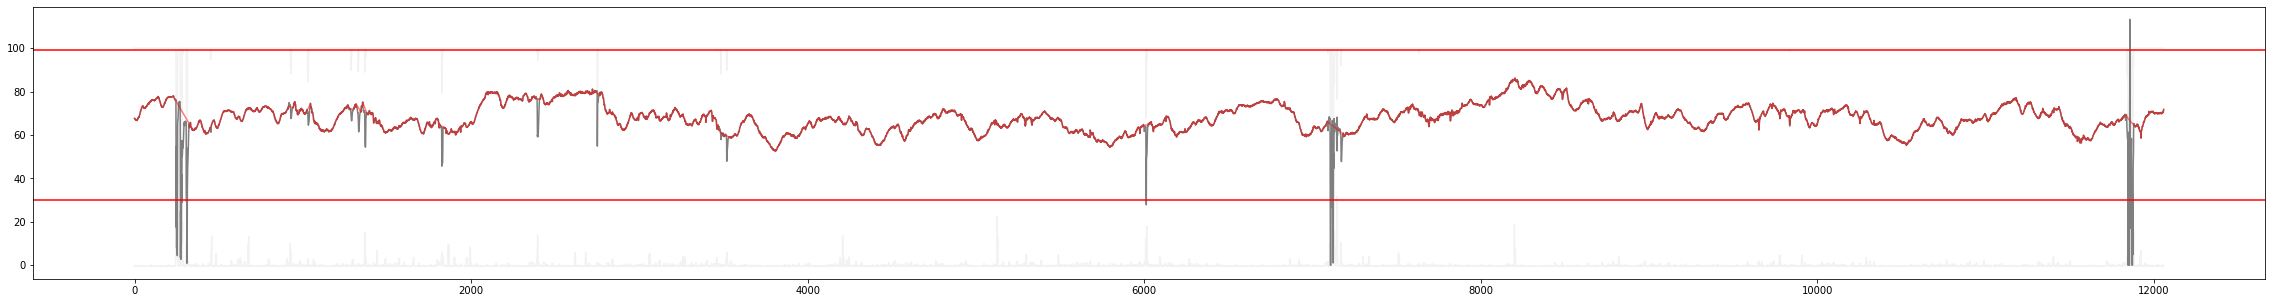

In [108]:

excel_thresh=30
confidence_thresh=.99
islands=10
margin1=10
margin2=10

p.discard_interp(excel_thresh=excel_thresh, confidence_thresh=confidence_thresh,
                     islands=islands, margin2=margin2, margin1=margin1)

f, ax = plt.subplots(figsize=(40, 5))
ax.plot(p.gp.diameter_mean.values, color='black', alpha=.5)
ax.plot(p.gp.d_intp.values, color='red', alpha=.5)

ax.plot(p.gp.confidence_d.values*100, color='grey', alpha=.1)
ax.axhline(confidence_thresh*100, color='red')
print(confidence_thresh)

ax.plot(p.gp.acceleration.values*2, color='grey', alpha=.1)
ax.axhline(excel_thresh, color='red')
plt.show()
p.normalize()
p.save()

### --> Subject 12 (PD) excluded from analysis for poor pupil data upon visual check

0.9


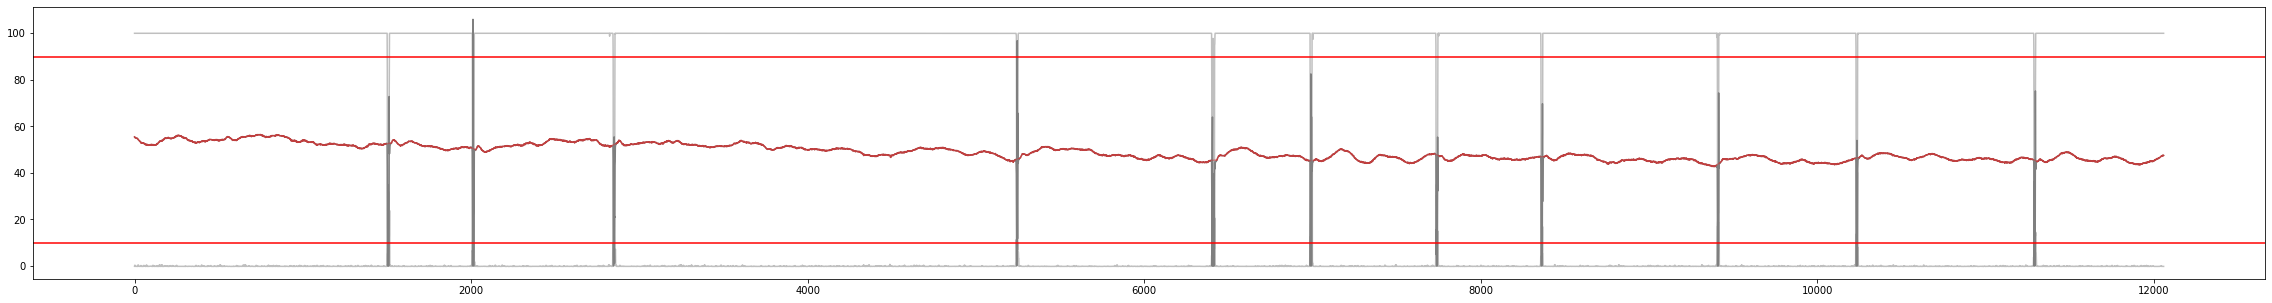

In [47]:
excel_thresh=10
confidence_thresh=.9
islands=10
margin1=10
margin2=10

p.discard_interp(excel_thresh=excel_thresh, confidence_thresh=confidence_thresh,
                     islands=islands, margin2=margin2, margin1=margin1)

f, ax = plt.subplots(figsize=(40, 5))
ax.plot(p.gp.diameter_mean.values, color='black', alpha=.5)
ax.plot(p.gp.d_intp.values, color='red', alpha=.5)

ax.plot(p.gp.confidence_d.values*100, color='grey', alpha=.5)
ax.axhline(confidence_thresh*100, color='red')
print(confidence_thresh)

ax.plot(p.gp.acceleration.values*2, color='grey', alpha=.5)
ax.axhline(excel_thresh, color='red')

